# Load Packages

In [1]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# df_1 = pd.DataFrame({'x_1' : [3], 'x_2' : [2], 'x_3' : [4], 'x_4' : [1]})
df_1 = pd.DataFrame({'Method' : ['x_1', 'x_2', 'x_3', 'x_4'], 'AUC' : [3, 2, 4, 1]})

In [3]:
df_2 = pd.DataFrame({'Method' : ['x_1', 'x_2', 'x_3', 'x_4'], 'AUC' : [5, 1, 3, 2]})

In [4]:
df_1

,Method,AUC
0,x_1,3
1,x_2,2
2,x_3,4
3,x_4,1


In [5]:
df_2

,Method,AUC
0,x_1,5
1,x_2,1
2,x_3,3
3,x_4,2


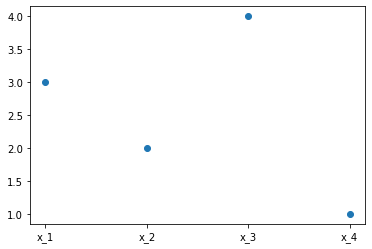

In [6]:
plt.scatter(df_1['Method'], df_1['AUC'])

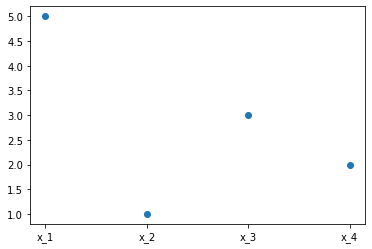

In [7]:
plt.scatter(df_2['Method'], df_2['AUC'])

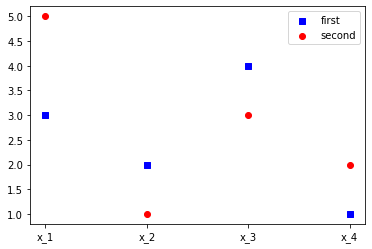

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(df_1['Method'], df_1['AUC'], c='b', marker="s", label='first')
ax1.scatter(df_2['Method'], df_2['AUC'], c='r', marker="o", label='second')
plt.legend(loc='upper right')
plt.show()

# Utilities

In [9]:
def constructPrefix(data_set_name:str, balanced:bool, encode:bool):
    prefix = ''
    if data_set_name == 'credit_card':
        if balanced:
            prefix = 'balanced_'
        else:
            prefix = 'unbalanced_'

    if encode:
        prefix =  "encoded_" + prefix 
        
    return prefix

In [10]:
def constructFilePath(directory_name:str, file_name:str, data_set_name:str, balanced:bool, encode:bool, tuned:bool):
    prefix = constructPrefix(data_set_name, balanced, encode)
    tuned_str = 'untuned'
    if tuned:
        tuned_str = 'tuned'

    file_path = directory_name + '/' + prefix + data_set_name + '_' + tuned_str + '_' + file_name + '.csv'
    if file_name == 'baseline_real_data_auc_score':
        file_path = directory_name + '/' + prefix + data_set_name + "_" + file_name + '.csv'
    return file_path

In [11]:
df_all_results_best_params = pd.DataFrame({'data_set_full_name' : [], 'train_roc' : [], 'val_roc' : [], 'test_roc' : [], 'total_time_GaussianCopula' : [],
                                         'total_time_CTGAN' : [], 'total_time_CopulaGAN' : [],  'total_time_TVAE' : [],
                                        'total_time_BO' : [] })

In [12]:
df_all_results_individual_models_performance = pd.DataFrame()

In [13]:
df_all_results_baseline_real_data_performance = pd.DataFrame({'data_set_full_name' : [], 'train_roc' : [], 'val_roc' : [], 'test_roc' : []})

In [14]:
file_name_clf_best_params = 'models_clf_best_param_xgboost'
file_name_alpha_params_sitory = 'models_params_alpha_history'
file_name_individual_clf_auc = 'models_clf_auc_score_and_time_per_each_individual_model'
directory_name_output = '../data/output/ES10/'
directory_name_history = '../data/history'

print('file_name_clf_best_params: ', file_name_clf_best_params)
print('file_name_alpha_params_sitory: ', file_name_alpha_params_sitory)
print('file_name_individual_clf_auc: ', file_name_individual_clf_auc)
print('directory_name_output: ', directory_name_output)
print('directory_name_history: ', directory_name_history)

file_name_clf_best_params:  models_clf_best_param_xgboost
file_name_alpha_params_sitory:  models_params_alpha_history
file_name_individual_clf_auc:  models_clf_auc_score_and_time_per_each_individual_model
directory_name_output:  ../data/output/ES10/
directory_name_history:  ../data/history


# Adult Data Set Untuned without Target Encoder

In [15]:
data_set_name = 'adult'
target = 'income'
encode = False
balanced = False
tuned = False
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = 'Adult'
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  adult
target:  income
encode:  False
balanced:  False
prefix:  
data_set_full_name:  Adult
directory_name_data:  ../data/adult


### Load Best Params

In [16]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/ES10//adult_untuned_models_clf_best_param_xgboost.csv


In [17]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.000534,0.452101,0.369335,0.178031,10000.0,0.925122,0.885191,0.885859,7311.12129,Adult


In [18]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.12129,0.000534,0.452101,0.369335,0.178031,10000.0


### Individual Models Performance

In [19]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/ES10//adult_untuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [20]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.81675,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.77555,3.642307,3.484904,Adult


In [21]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.81675,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.77555,3.642307,3.484904,Adult


### LoadH istory

In [22]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/adult_untuned_models_params_alpha_history.csv


In [23]:
df_alpha_params_history = pd.read_csv(file_path_alpha_params_history)
df_alpha_params_history['data_set_full_name'] = data_set_full_name
df_alpha_params_history

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,data_set_full_name
0,0.008930,0.495316,0.187413,0.308342,10000.0,0.939789,0.879834,Adult
1,0.087301,0.369223,0.255528,0.287947,10000.0,0.932047,0.874129,Adult
2,0.317787,0.558516,0.048488,0.075209,10000.0,0.910366,0.873173,Adult
3,0.208360,0.359450,0.043246,0.388944,10000.0,0.928653,0.871142,Adult
4,0.238017,0.130995,0.406089,0.224898,10000.0,0.904900,0.875008,Adult
...,...,...,...,...,...,...,...,...
1996,0.067828,0.377245,0.398948,0.155979,10000.0,0.921763,0.878043,Adult
1997,0.042688,0.447068,0.368431,0.141813,10000.0,0.924898,0.876090,Adult
1998,0.016457,0.459582,0.427626,0.096335,10000.0,0.920576,0.865826,Adult
1999,0.009665,0.427329,0.364133,0.198872,10000.0,0.932692,0.875911,Adult


In [24]:
df_plot = pd.DataFrame({'train_roc' : [], 'val_roc' : []})
df_plot.train_roc = df_alpha_params_history.train_roc
df_plot.val_roc = df_alpha_params_history.val_roc
df_plot

,train_roc,val_roc
0,0.939789,0.879834
1,0.932047,0.874129
2,0.910366,0.873173
3,0.928653,0.871142
4,0.904900,0.875008
...,...,...
1996,0.921763,0.878043
1997,0.924898,0.876090
1998,0.920576,0.865826
1999,0.932692,0.875911


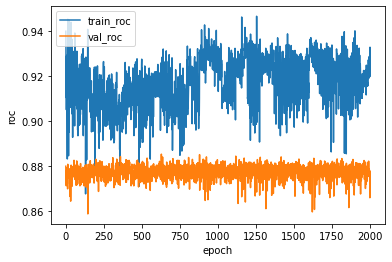

In [25]:
df_plot.plot()
plt.xlabel('epoch')
plt.ylabel('roc')
plt.show()

### Baseline Model Performance (XGBoost only real data)

In [26]:
file_name_clf_auc_df_real_data_only = 'baseline_real_data_auc_score'
file_path_clf_auc_df_real_data_only = constructFilePath(directory_name_output, file_name_clf_auc_df_real_data_only, data_set_name, balanced, encode, tuned)
print('file_path_clf_auc_df_real_data_only: ', file_path_clf_auc_df_real_data_only)

file_path_clf_auc_df_real_data_only:  ../data/output/ES10//adult_baseline_real_data_auc_score.csv


In [27]:
df_clf_auc_df_real_data_only = pd.read_csv(file_path_clf_auc_df_real_data_only)
df_clf_auc_df_real_data_only['data_set_full_name'] = data_set_full_name
df_clf_auc_df_real_data_only

,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test,data_set_full_name
0,0.999282,0.903855,0.908055,31655.0,9035.0,4532.0,Adult


In [28]:
df_all_results_baseline_real_data_performance = df_all_results_baseline_real_data_performance.append(df_clf_auc_df_real_data_only, ignore_index = True)
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999282,0.903855,0.908055,31655.0,9035.0,4532.0


# Adult Data Set Untuned with Target Encoder

In [29]:
data_set_name = 'adult'
target = 'income'
encode = True
balanced = False
tuned = False
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = 'Adult Transformed'
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  adult
target:  income
encode:  True
balanced:  False
prefix:  encoded_
data_set_full_name:  Adult Transformed
directory_name_data:  ../data/adult


### Load Best Params

In [30]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/ES10//encoded_adult_untuned_models_clf_best_param_xgboost.csv


In [31]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.239544,0.356257,0.098823,0.305377,10000.0,0.926069,0.881387,0.886303,239.284498,Adult Transformed


In [32]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.121290,0.000534,0.452101,0.369335,0.178031,10000.0
1,Adult Transformed,0.926069,0.881387,0.886303,NaN,NaN,NaN,NaN,239.284498,0.239544,0.356257,0.098823,0.305377,10000.0


### Individual Models Performance

In [33]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/ES10//encoded_adult_untuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [34]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.80182,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed


In [35]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.81675,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.775550,3.642307,3.484904,Adult
1,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.80182,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed


### Load History 

In [36]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/encoded_adult_untuned_models_params_alpha_history.csv


In [37]:
df_alpha_params_history = pd.read_csv(file_path_alpha_params_history)
df_alpha_params_history['data_set_full_name'] = data_set_full_name
df_alpha_params_history

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,data_set_full_name
0,0.183859,0.293939,0.025977,0.496225,10000.0,0.938797,0.870893,Adult Transformed
1,0.337977,0.258144,0.292499,0.111381,10000.0,0.906004,0.861997,Adult Transformed
2,0.296533,0.249394,0.251532,0.202541,10000.0,0.918484,0.868545,Adult Transformed
3,0.174465,0.241637,0.101667,0.482232,10000.0,0.939565,0.871550,Adult Transformed
4,0.235308,0.273553,0.191770,0.299369,10000.0,0.926860,0.870408,Adult Transformed
...,...,...,...,...,...,...,...,...
1996,0.245618,0.357940,0.078435,0.318007,10000.0,0.925727,0.873003,Adult Transformed
1997,0.262274,0.342018,0.061980,0.333727,10000.0,0.928058,0.870242,Adult Transformed
1998,0.235777,0.328482,0.047943,0.387797,10000.0,0.932606,0.874580,Adult Transformed
1999,0.241754,0.367577,0.033592,0.357077,10000.0,0.930080,0.857812,Adult Transformed


In [38]:
df_plot = pd.DataFrame({'train_roc' : [], 'val_roc' : []})
df_plot.train_roc = df_alpha_params_history.train_roc
df_plot.val_roc = df_alpha_params_history.val_roc
df_plot

,train_roc,val_roc
0,0.938797,0.870893
1,0.906004,0.861997
2,0.918484,0.868545
3,0.939565,0.871550
4,0.926860,0.870408
...,...,...
1996,0.925727,0.873003
1997,0.928058,0.870242
1998,0.932606,0.874580
1999,0.930080,0.857812


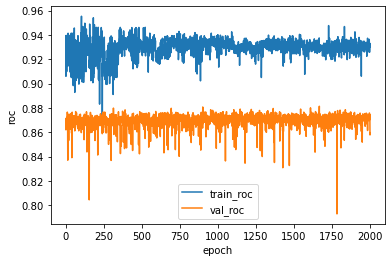

In [39]:
df_plot.plot()
plt.xlabel('epoch')
plt.ylabel('roc')
plt.show()

### Baseline Model Performance (XGBoost only real data)

In [40]:
file_name_clf_auc_df_real_data_only = 'baseline_real_data_auc_score'
file_path_clf_auc_df_real_data_only = constructFilePath(directory_name_output, file_name_clf_auc_df_real_data_only, data_set_name, balanced, encode, tuned)
print('file_path_clf_auc_df_real_data_only: ', file_path_clf_auc_df_real_data_only)

file_path_clf_auc_df_real_data_only:  ../data/output/ES10//encoded_adult_baseline_real_data_auc_score.csv


In [41]:
df_clf_auc_df_real_data_only = pd.read_csv(file_path_clf_auc_df_real_data_only)
df_clf_auc_df_real_data_only['data_set_full_name'] = data_set_full_name
df_clf_auc_df_real_data_only

,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test,data_set_full_name
0,0.999061,0.903384,0.916646,31655.0,9035.0,4532.0,Adult Transformed


In [42]:
df_all_results_baseline_real_data_performance = df_all_results_baseline_real_data_performance.append(df_clf_auc_df_real_data_only, ignore_index = True)
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999282,0.903855,0.908055,31655.0,9035.0,4532.0
1,Adult Transformed,NaN,NaN,NaN,0.999061,0.903384,0.916646,31655.0,9035.0,4532.0


# Imbalanced Credit Card Data Set Untuned without Target Encoder

In [43]:
data_set_name = 'credit_card'
target = 'Class'
encode = False
balanced = False
tuned = False
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = 'Credit Imbalanced'
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  credit_card
target:  Class
encode:  False
balanced:  False
prefix:  unbalanced_
data_set_full_name:  Credit Imbalanced
directory_name_data:  ../data/credit_card


### Load Best Params

In [44]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/ES10//unbalanced_credit_card_untuned_models_clf_best_param_xgboost.csv


In [45]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.451228,0.405617,0.003262,0.139893,10000.0,0.998308,1.0,0.891409,207.474368,Credit Imbalanced


In [46]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.121290,0.000534,0.452101,0.369335,0.178031,10000.0
1,Adult Transformed,0.926069,0.881387,0.886303,NaN,NaN,NaN,NaN,239.284498,0.239544,0.356257,0.098823,0.305377,10000.0
2,Credit Imbalanced,0.998308,1.000000,0.891409,NaN,NaN,NaN,NaN,207.474368,0.451228,0.405617,0.003262,0.139893,10000.0


### Individual Models Performance

In [47]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/ES10//unbalanced_credit_card_untuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [48]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.999925,0.883756,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,10000.0,9990.0,5010.0,0.634405,0.003859,0.003342,0.003172,Credit Imbalanced


In [49]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.81675,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.775550,3.642307,3.484904,Adult
1,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.80182,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.50000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.634405,0.003859,0.003342,0.003172,Credit Imbalanced


### Load History

In [50]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/unbalanced_credit_card_untuned_models_params_alpha_history.csv


In [51]:
df_alpha_params_history = pd.read_csv(file_path_alpha_params_history)
df_alpha_params_history['data_set_full_name'] = data_set_full_name
df_alpha_params_history

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,data_set_full_name
0,0.994047,0.001984,0.001984,0.001984,10000.0,0.936310,0.999810,Credit Imbalanced
1,0.546178,0.239178,0.125775,0.088869,10000.0,0.999706,0.499850,Credit Imbalanced
2,0.177649,0.380645,0.270415,0.171291,10000.0,0.999904,0.499900,Credit Imbalanced
3,0.137788,0.447965,0.069880,0.344368,10000.0,0.999997,0.499850,Credit Imbalanced
4,0.223179,0.304809,0.293292,0.178720,10000.0,0.999873,0.499900,Credit Imbalanced
...,...,...,...,...,...,...,...,...
1996,0.732794,0.049982,0.013523,0.203701,10000.0,0.996919,0.920932,Credit Imbalanced
1997,0.665585,0.012010,0.035614,0.286792,10000.0,0.999501,0.770987,Credit Imbalanced
1998,0.687547,0.033524,0.026702,0.252226,10000.0,0.999747,0.676568,Credit Imbalanced
1999,0.696684,0.000890,0.047741,0.254686,10000.0,0.999318,0.620676,Credit Imbalanced


In [52]:
df_plot = pd.DataFrame({'train_roc' : [], 'val_roc' : []})
df_plot.train_roc = df_alpha_params_history.train_roc
df_plot.val_roc = df_alpha_params_history.val_roc
df_plot

,train_roc,val_roc
0,0.936310,0.999810
1,0.999706,0.499850
2,0.999904,0.499900
3,0.999997,0.499850
4,0.999873,0.499900
...,...,...
1996,0.996919,0.920932
1997,0.999501,0.770987
1998,0.999747,0.676568
1999,0.999318,0.620676


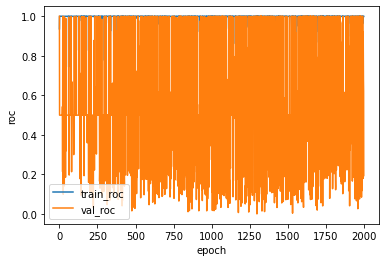

In [53]:
df_plot.plot()
plt.xlabel('epoch')
plt.ylabel('roc')
plt.show()

# Baseline Model Performance (XGBoost only real data)

In [54]:
file_name_clf_auc_df_real_data_only = 'baseline_real_data_auc_score'
file_path_clf_auc_df_real_data_only = constructFilePath(directory_name_output, file_name_clf_auc_df_real_data_only, data_set_name, balanced, encode, tuned)
print('file_path_clf_auc_df_real_data_only: ', file_path_clf_auc_df_real_data_only)

file_path_clf_auc_df_real_data_only:  ../data/output/ES10//unbalanced_credit_card_baseline_real_data_auc_score.csv


In [55]:
df_clf_auc_df_real_data_only = pd.read_csv(file_path_clf_auc_df_real_data_only)
df_clf_auc_df_real_data_only['data_set_full_name'] = data_set_full_name
df_clf_auc_df_real_data_only

,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test,data_set_full_name
0,1.0,1.0,0.878242,35000.0,9990.0,5010.0,Credit Imbalanced


In [56]:
df_all_results_baseline_real_data_performance = df_all_results_baseline_real_data_performance.append(df_clf_auc_df_real_data_only, ignore_index = True)
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999282,0.903855,0.908055,31655.0,9035.0,4532.0
1,Adult Transformed,NaN,NaN,NaN,0.999061,0.903384,0.916646,31655.0,9035.0,4532.0
2,Credit Imbalanced,NaN,NaN,NaN,1.000000,1.000000,0.878242,35000.0,9990.0,5010.0


# Balanced Credit Card Data Set Untuned without Target Encoder

In [57]:
data_set_name = 'credit_card'
target = 'Class'
encode = False
balanced = True
tuned = False
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = 'Credit Balanced'
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  credit_card
target:  Class
encode:  False
balanced:  True
prefix:  balanced_
data_set_full_name:  Credit Balanced
directory_name_data:  ../data/credit_card


### Load Best Params

In [58]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/ES10//balanced_credit_card_untuned_models_clf_best_param_xgboost.csv


In [59]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.25686,0.000212,0.079602,0.663326,10000.0,0.992573,0.981566,0.980266,247.740318,Credit Balanced


In [60]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.121290,0.000534,0.452101,0.369335,0.178031,10000.0
1,Adult Transformed,0.926069,0.881387,0.886303,NaN,NaN,NaN,NaN,239.284498,0.239544,0.356257,0.098823,0.305377,10000.0
2,Credit Imbalanced,0.998308,1.000000,0.891409,NaN,NaN,NaN,NaN,207.474368,0.451228,0.405617,0.003262,0.139893,10000.0
3,Credit Balanced,0.992573,0.981566,0.980266,NaN,NaN,NaN,NaN,247.740318,0.256860,0.000212,0.079602,0.663326,10000.0


### Individual Models Performance

In [61]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/ES10//balanced_credit_card_untuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [62]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.959358,0.956424,1.0,0.985292,0.98502,10000.0,9990.0,5010.0,3.765812,3.478645,3.644362,3.457259,Credit Balanced


In [63]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.775550,3.642307,3.484904,Adult
1,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.634405,0.003859,0.003342,0.003172,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.959358,0.956424,1.0,0.985292,0.985020,10000.0,9990.0,5010.0,3.765812,3.478645,3.644362,3.457259,Credit Balanced


### Load History

In [64]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/balanced_credit_card_untuned_models_params_alpha_history.csv


In [65]:
df_alpha_params_history = pd.read_csv(file_path_alpha_params_history)
df_alpha_params_history['data_set_full_name'] = data_set_full_name
df_alpha_params_history

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,data_set_full_name
0,0.010236,0.265259,0.197497,0.527008,10000.0,0.994019,0.974189,Credit Balanced
1,0.160613,0.212894,0.298720,0.327772,10000.0,0.989001,0.971433,Credit Balanced
2,0.570350,0.172034,0.053075,0.204541,10000.0,0.986884,0.969613,Credit Balanced
3,0.151788,0.343318,0.100669,0.404226,10000.0,0.991466,0.969099,Credit Balanced
4,0.286812,0.488815,0.079930,0.144444,10000.0,0.990651,0.962603,Credit Balanced
...,...,...,...,...,...,...,...,...
1996,0.116383,0.070996,0.068595,0.744026,10000.0,0.992987,0.975098,Credit Balanced
1997,0.184008,0.022031,0.036732,0.757229,10000.0,0.993587,0.979165,Credit Balanced
1998,0.161856,0.089538,0.078372,0.670234,10000.0,0.992088,0.974332,Credit Balanced
1999,0.227426,0.045781,0.051949,0.674843,10000.0,0.992399,0.974732,Credit Balanced


In [66]:
df_plot = pd.DataFrame({'train_roc' : [], 'val_roc' : []})
df_plot.train_roc = df_alpha_params_history.train_roc
df_plot.val_roc = df_alpha_params_history.val_roc
df_plot

,train_roc,val_roc
0,0.994019,0.974189
1,0.989001,0.971433
2,0.986884,0.969613
3,0.991466,0.969099
4,0.990651,0.962603
...,...,...
1996,0.992987,0.975098
1997,0.993587,0.979165
1998,0.992088,0.974332
1999,0.992399,0.974732


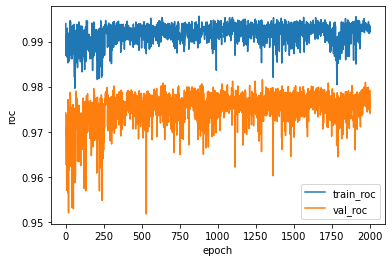

In [67]:
df_plot.plot()
plt.xlabel('epoch')
plt.ylabel('roc')
plt.show()

# Baseline Model Performance (XGBoost only real data)

In [68]:
file_name_clf_auc_df_real_data_only = 'baseline_real_data_auc_score'
file_path_clf_auc_df_real_data_only = constructFilePath(directory_name_output, file_name_clf_auc_df_real_data_only, data_set_name, balanced, encode, tuned)
print('file_path_clf_auc_df_real_data_only: ', file_path_clf_auc_df_real_data_only)

file_path_clf_auc_df_real_data_only:  ../data/output/ES10//balanced_credit_card_baseline_real_data_auc_score.csv


In [69]:
df_clf_auc_df_real_data_only = pd.read_csv(file_path_clf_auc_df_real_data_only)
df_clf_auc_df_real_data_only['data_set_full_name'] = data_set_full_name
df_clf_auc_df_real_data_only

,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test,data_set_full_name
0,1.0,0.999933,0.999961,35000.0,9990.0,5010.0,Credit Balanced


In [70]:
df_all_results_baseline_real_data_performance = df_all_results_baseline_real_data_performance.append(df_clf_auc_df_real_data_only, ignore_index = True)
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999282,0.903855,0.908055,31655.0,9035.0,4532.0
1,Adult Transformed,NaN,NaN,NaN,0.999061,0.903384,0.916646,31655.0,9035.0,4532.0
2,Credit Imbalanced,NaN,NaN,NaN,1.000000,1.000000,0.878242,35000.0,9990.0,5010.0
3,Credit Balanced,NaN,NaN,NaN,1.000000,0.999933,0.999961,35000.0,9990.0,5010.0


# Adult Data Set Tuned without Target Encoder

In [71]:
data_set_name = 'adult'
target = 'income'
encode = False
balanced = False
tuned = True
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = prefix + 'tuned_' + data_set_name
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  adult
target:  income
encode:  False
balanced:  False
prefix:  
data_set_full_name:  tuned_adult
directory_name_data:  ../data/adult


### Load Best Params

In [72]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/ES10//adult_tuned_models_clf_best_param_xgboost.csv


In [73]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.05587,0.391768,0.312269,0.240093,10000.0,0.922695,0.889318,0.893997,256.668402,tuned_adult


In [74]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.121290,0.000534,0.452101,0.369335,0.178031,10000.0
1,Adult Transformed,0.926069,0.881387,0.886303,NaN,NaN,NaN,NaN,239.284498,0.239544,0.356257,0.098823,0.305377,10000.0
2,Credit Imbalanced,0.998308,1.000000,0.891409,NaN,NaN,NaN,NaN,207.474368,0.451228,0.405617,0.003262,0.139893,10000.0
3,Credit Balanced,0.992573,0.981566,0.980266,NaN,NaN,NaN,NaN,247.740318,0.256860,0.000212,0.079602,0.663326,10000.0
4,tuned_adult,0.922695,0.889318,0.893997,NaN,NaN,NaN,NaN,256.668402,0.055870,0.391768,0.312269,0.240093,10000.0


### Individual Models Performance

In [75]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/ES10//adult_tuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [76]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.81675,0.788476,1.0,0.830292,0.838562,10000.0,9035.0,4532.0,4.547677,4.231854,3.672726,3.581369,tuned_adult


In [77]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.775550,3.642307,3.484904,Adult
1,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.634405,0.003859,0.003342,0.003172,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.959358,0.956424,1.0,0.985292,0.985020,10000.0,9990.0,5010.0,3.765812,3.478645,3.644362,3.457259,Credit Balanced
4,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.830292,0.838562,10000.0,9035.0,4532.0,4.547677,4.231854,3.672726,3.581369,tuned_adult


### Load History

In [78]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/adult_tuned_models_params_alpha_history.csv


# Adult Data Set Tuned with Target Encoder

In [79]:
data_set_name = 'adult'
target = 'income'
encode = True
balanced = False
tuned = True
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = prefix + 'tuned_' + data_set_name
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  adult
target:  income
encode:  True
balanced:  False
prefix:  encoded_
data_set_full_name:  encoded_tuned_adult
directory_name_data:  ../data/adult


### Load Best Params

In [80]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/ES10//encoded_adult_tuned_models_clf_best_param_xgboost.csv


In [81]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.322629,0.249696,0.078791,0.348885,10000.0,0.913666,0.884775,0.886312,254.650471,encoded_tuned_adult


In [82]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.121290,0.000534,0.452101,0.369335,0.178031,10000.0
1,Adult Transformed,0.926069,0.881387,0.886303,NaN,NaN,NaN,NaN,239.284498,0.239544,0.356257,0.098823,0.305377,10000.0
2,Credit Imbalanced,0.998308,1.000000,0.891409,NaN,NaN,NaN,NaN,207.474368,0.451228,0.405617,0.003262,0.139893,10000.0
3,Credit Balanced,0.992573,0.981566,0.980266,NaN,NaN,NaN,NaN,247.740318,0.256860,0.000212,0.079602,0.663326,10000.0
4,tuned_adult,0.922695,0.889318,0.893997,NaN,NaN,NaN,NaN,256.668402,0.055870,0.391768,0.312269,0.240093,10000.0
5,encoded_tuned_adult,0.913666,0.884775,0.886312,NaN,NaN,NaN,NaN,254.650471,0.322629,0.249696,0.078791,0.348885,10000.0


### Individual Models Performance

In [83]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/ES10//encoded_adult_tuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [84]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.80182,0.810472,1.0,0.824726,0.834146,10000.0,9035.0,4532.0,4.270889,3.786172,3.480391,3.579724,encoded_tuned_adult


In [85]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.775550,3.642307,3.484904,Adult
1,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.634405,0.003859,0.003342,0.003172,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.959358,0.956424,1.0,0.985292,0.985020,10000.0,9990.0,5010.0,3.765812,3.478645,3.644362,3.457259,Credit Balanced
4,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.830292,0.838562,10000.0,9035.0,4532.0,4.547677,4.231854,3.672726,3.581369,tuned_adult
5,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.824726,0.834146,10000.0,9035.0,4532.0,4.270889,3.786172,3.480391,3.579724,encoded_tuned_adult


### Load History

In [86]:
file_path_alpha_params_history = constructFilePath(directory_name_history, file_name_alpha_params_sitory, data_set_name, balanced, encode, tuned)
print('file_path_alpha_params_history: ', file_path_alpha_params_history)

file_path_alpha_params_history:  ../data/history/encoded_adult_tuned_models_params_alpha_history.csv


# Imbalanced Credit Card Data Set Tuned without Target Encoder

In [87]:
data_set_name = 'credit_card'
target = 'income'
encode = False
balanced = False
tuned = True
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name =  'imbalanced_tuned_' + data_set_name
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  credit_card
target:  income
encode:  False
balanced:  False
prefix:  unbalanced_
data_set_full_name:  imbalanced_tuned_credit_card
directory_name_data:  ../data/credit_card


### Load Best Params

In [88]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/ES10//unbalanced_credit_card_tuned_models_clf_best_param_xgboost.csv


In [89]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.504891,0.096573,0.00003,0.398506,10000.0,0.99923,0.99998,0.979161,504.707666,imbalanced_tuned_credit_card


In [90]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.121290,0.000534,0.452101,0.369335,0.178031,10000.0
1,Adult Transformed,0.926069,0.881387,0.886303,NaN,NaN,NaN,NaN,239.284498,0.239544,0.356257,0.098823,0.305377,10000.0
2,Credit Imbalanced,0.998308,1.000000,0.891409,NaN,NaN,NaN,NaN,207.474368,0.451228,0.405617,0.003262,0.139893,10000.0
3,Credit Balanced,0.992573,0.981566,0.980266,NaN,NaN,NaN,NaN,247.740318,0.256860,0.000212,0.079602,0.663326,10000.0
4,tuned_adult,0.922695,0.889318,0.893997,NaN,NaN,NaN,NaN,256.668402,0.055870,0.391768,0.312269,0.240093,10000.0
5,encoded_tuned_adult,0.913666,0.884775,0.886312,NaN,NaN,NaN,NaN,254.650471,0.322629,0.249696,0.078791,0.348885,10000.0
6,imbalanced_tuned_credit_card,0.999230,0.999980,0.979161,NaN,NaN,NaN,NaN,504.707666,0.504891,0.096573,0.000030,0.398506,10000.0


### Individual Models Performance

In [91]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/ES10//unbalanced_credit_card_tuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [92]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.999925,0.883756,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,10000.0,9990.0,5010.0,0.567996,0.0036,0.003159,0.002423,imbalanced_tuned_credit_card


In [93]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.775550,3.642307,3.484904,Adult
1,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.634405,0.003859,0.003342,0.003172,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.959358,0.956424,1.0,0.985292,0.985020,10000.0,9990.0,5010.0,3.765812,3.478645,3.644362,3.457259,Credit Balanced
4,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.830292,0.838562,10000.0,9035.0,4532.0,4.547677,4.231854,3.672726,3.581369,tuned_adult
5,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.824726,0.834146,10000.0,9035.0,4532.0,4.270889,3.786172,3.480391,3.579724,encoded_tuned_adult
6,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.567996,0.003600,0.003159,0.002423,imbalanced_tuned_credit_card


### Load History

# Balanced Credit Card Data Set Tuned without Target Encoder

In [94]:
data_set_name = 'credit_card'
target = 'income'
encode = False
balanced = True
tuned = True
prefix = constructPrefix(data_set_name, balanced, encode)
data_set_full_name = prefix + 'tuned_' + data_set_name
directory_name_data = "../data/" + data_set_name

print('data_set_name: ', data_set_name)
print('target: ', target)
print('encode: ', encode)
print('balanced: ', balanced)
print('prefix: ', prefix)
print('data_set_full_name: ', data_set_full_name)
print('directory_name_data: ', directory_name_data)

data_set_name:  credit_card
target:  income
encode:  False
balanced:  True
prefix:  balanced_
data_set_full_name:  balanced_tuned_credit_card
directory_name_data:  ../data/credit_card


### Laod Best Params

In [95]:
file_path_clf_best_params = constructFilePath(directory_name_output, file_name_clf_best_params, data_set_name, balanced, encode, tuned)
print('file_path_clf_best_params: ', file_path_clf_best_params)

file_path_clf_best_params:  ../data/output/ES10//balanced_credit_card_tuned_models_clf_best_param_xgboost.csv


In [96]:
df_clf_best_params = pd.read_csv(file_path_clf_best_params)
df_clf_best_params['data_set_full_name'] = data_set_full_name
df_clf_best_params

,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size,train_roc,val_roc,test_roc,total_time_BO,data_set_full_name
0,0.462463,0.09169,0.03021,0.415636,10000.0,0.992578,0.97908,0.976695,238.366754,balanced_tuned_credit_card


In [97]:
df_all_results_best_params = df_all_results_best_params.append(df_clf_best_params, ignore_index = True)
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.121290,0.000534,0.452101,0.369335,0.178031,10000.0
1,Adult Transformed,0.926069,0.881387,0.886303,NaN,NaN,NaN,NaN,239.284498,0.239544,0.356257,0.098823,0.305377,10000.0
2,Credit Imbalanced,0.998308,1.000000,0.891409,NaN,NaN,NaN,NaN,207.474368,0.451228,0.405617,0.003262,0.139893,10000.0
3,Credit Balanced,0.992573,0.981566,0.980266,NaN,NaN,NaN,NaN,247.740318,0.256860,0.000212,0.079602,0.663326,10000.0
4,tuned_adult,0.922695,0.889318,0.893997,NaN,NaN,NaN,NaN,256.668402,0.055870,0.391768,0.312269,0.240093,10000.0
5,encoded_tuned_adult,0.913666,0.884775,0.886312,NaN,NaN,NaN,NaN,254.650471,0.322629,0.249696,0.078791,0.348885,10000.0
6,imbalanced_tuned_credit_card,0.999230,0.999980,0.979161,NaN,NaN,NaN,NaN,504.707666,0.504891,0.096573,0.000030,0.398506,10000.0
7,balanced_tuned_credit_card,0.992578,0.979080,0.976695,NaN,NaN,NaN,NaN,238.366754,0.462463,0.091690,0.030210,0.415636,10000.0


### Individual Models Performance

In [98]:
file_path_individual_clf_auc = constructFilePath(directory_name_output, file_name_individual_clf_auc, data_set_name, balanced, encode, tuned)
print('file_path_individual_clf_auc: ', file_path_individual_clf_auc)

file_path_individual_clf_auc:  ../data/output/ES10//balanced_credit_card_tuned_models_clf_auc_score_and_time_per_each_individual_model.csv


In [99]:
individual_clf_auc_df = pd.read_csv(file_path_individual_clf_auc)
individual_clf_auc_df['data_set_full_name'] = data_set_full_name
individual_clf_auc_df

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.950756,0.945916,1.0,0.982946,0.983671,10000.0,9990.0,5010.0,3.761567,3.273838,3.587604,3.232085,balanced_tuned_credit_card


In [100]:
df_all_results_individual_models_performance = df_all_results_individual_models_performance.append(individual_clf_auc_df, ignore_index = True)
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.775550,3.642307,3.484904,Adult
1,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.634405,0.003859,0.003342,0.003172,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.959358,0.956424,1.0,0.985292,0.985020,10000.0,9990.0,5010.0,3.765812,3.478645,3.644362,3.457259,Credit Balanced
4,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.830292,0.838562,10000.0,9035.0,4532.0,4.547677,4.231854,3.672726,3.581369,tuned_adult
5,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.824726,0.834146,10000.0,9035.0,4532.0,4.270889,3.786172,3.480391,3.579724,encoded_tuned_adult
6,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.567996,0.003600,0.003159,0.002423,imbalanced_tuned_credit_card
7,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.950756,0.945916,1.0,0.982946,0.983671,10000.0,9990.0,5010.0,3.761567,3.273838,3.587604,3.232085,balanced_tuned_credit_card


### Load History

# Save All Results

In [101]:
df_all_results_best_params

,data_set_full_name,train_roc,val_roc,test_roc,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,total_time_BO,alpha_1,alpha_2,alpha_3,alpha_4,generated_data_size
0,Adult,0.925122,0.885191,0.885859,NaN,NaN,NaN,NaN,7311.121290,0.000534,0.452101,0.369335,0.178031,10000.0
1,Adult Transformed,0.926069,0.881387,0.886303,NaN,NaN,NaN,NaN,239.284498,0.239544,0.356257,0.098823,0.305377,10000.0
2,Credit Imbalanced,0.998308,1.000000,0.891409,NaN,NaN,NaN,NaN,207.474368,0.451228,0.405617,0.003262,0.139893,10000.0
3,Credit Balanced,0.992573,0.981566,0.980266,NaN,NaN,NaN,NaN,247.740318,0.256860,0.000212,0.079602,0.663326,10000.0
4,tuned_adult,0.922695,0.889318,0.893997,NaN,NaN,NaN,NaN,256.668402,0.055870,0.391768,0.312269,0.240093,10000.0
5,encoded_tuned_adult,0.913666,0.884775,0.886312,NaN,NaN,NaN,NaN,254.650471,0.322629,0.249696,0.078791,0.348885,10000.0
6,imbalanced_tuned_credit_card,0.999230,0.999980,0.979161,NaN,NaN,NaN,NaN,504.707666,0.504891,0.096573,0.000030,0.398506,10000.0
7,balanced_tuned_credit_card,0.992578,0.979080,0.976695,NaN,NaN,NaN,NaN,238.366754,0.462463,0.091690,0.030210,0.415636,10000.0


In [102]:
df_all_results_best_params.to_csv('../data/df_all_results_best_params.csv')

In [103]:
df_all_results_baseline_real_data_performance

,data_set_full_name,train_roc,val_roc,test_roc,clf_auc_train,clf_auc_val,clf_auc_test,train,val,test
0,Adult,NaN,NaN,NaN,0.999282,0.903855,0.908055,31655.0,9035.0,4532.0
1,Adult Transformed,NaN,NaN,NaN,0.999061,0.903384,0.916646,31655.0,9035.0,4532.0
2,Credit Imbalanced,NaN,NaN,NaN,1.000000,1.000000,0.878242,35000.0,9990.0,5010.0
3,Credit Balanced,NaN,NaN,NaN,1.000000,0.999933,0.999961,35000.0,9990.0,5010.0


In [104]:
df_all_results_baseline_real_data_performance.to_csv('../data/df_all_results_baseline_real_data_performance.csv')

In [105]:
df_all_results_individual_models_performance

,clf_auc_train_gaussain_copula,clf_auc_val_gaussain_copula,clf_auc_test_gaussain_copula,clf_auc_train_ct_gan,clf_auc_val_ct_gan,clf_auc_test_ct_gan,clf_auc_train_copula_gan,clf_auc_val_copula_gan,clf_auc_test_copula_gan,clf_auc_train_tvae,clf_auc_val_tvae,clf_auc_test_tvae,train,val,test,total_time_GaussianCopula,total_time_CTGAN,total_time_CopulaGAN,total_time_TVAE,data_set_full_name
0,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.834362,0.842977,10000.0,9035.0,4532.0,15.010969,3.775550,3.642307,3.484904,Adult
1,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.856861,0.859379,10000.0,9035.0,4532.0,4.098781,3.810292,3.525312,3.592063,Adult Transformed
2,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.634405,0.003859,0.003342,0.003172,Credit Imbalanced
3,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.959358,0.956424,1.0,0.985292,0.985020,10000.0,9990.0,5010.0,3.765812,3.478645,3.644362,3.457259,Credit Balanced
4,1.0,0.796764,0.767879,1.0,0.851229,0.853426,1.0,0.816750,0.788476,1.0,0.830292,0.838562,10000.0,9035.0,4532.0,4.547677,4.231854,3.672726,3.581369,tuned_adult
5,1.0,0.815603,0.844834,1.0,0.815741,0.811518,1.0,0.801820,0.810472,1.0,0.824726,0.834146,10000.0,9035.0,4532.0,4.270889,3.786172,3.480391,3.579724,encoded_tuned_adult
6,1.0,0.999925,0.883756,0.5,0.500000,0.500000,0.5,0.500000,0.500000,0.5,0.500000,0.500000,10000.0,9990.0,5010.0,0.567996,0.003600,0.003159,0.002423,imbalanced_tuned_credit_card
7,1.0,0.932462,0.931923,1.0,0.957376,0.956412,1.0,0.950756,0.945916,1.0,0.982946,0.983671,10000.0,9990.0,5010.0,3.761567,3.273838,3.587604,3.232085,balanced_tuned_credit_card


In [106]:
df_all_results_individual_models_performance.to_csv('../data/df_all_results_individual_models_performance.csv')

In [107]:
columns_needed_val = ['data_set_full_name', 'clf_auc_val_gaussain_copula', 'clf_auc_val_ct_gan', 'clf_auc_val_copula_gan', 'clf_auc_val_tvae']
df_all_results_individual_models_performance[columns_needed_val]

,data_set_full_name,clf_auc_val_gaussain_copula,clf_auc_val_ct_gan,clf_auc_val_copula_gan,clf_auc_val_tvae
0,Adult,0.796764,0.851229,0.816750,0.834362
1,Adult Transformed,0.815603,0.815741,0.801820,0.856861
2,Credit Imbalanced,0.999925,0.500000,0.500000,0.500000
3,Credit Balanced,0.932462,0.957376,0.959358,0.985292
4,tuned_adult,0.796764,0.851229,0.816750,0.830292
5,encoded_tuned_adult,0.815603,0.815741,0.801820,0.824726
6,imbalanced_tuned_credit_card,0.999925,0.500000,0.500000,0.500000
7,balanced_tuned_credit_card,0.932462,0.957376,0.950756,0.982946


In [108]:
columns_needed_test = ['data_set_full_name', 'clf_auc_test_gaussain_copula', 'clf_auc_test_ct_gan', 'clf_auc_test_copula_gan', 'clf_auc_test_tvae']
# df_all_results_individual_models_performance[columns_needed_test]
df_all_results_individual_models_performance[columns_needed_val]

,data_set_full_name,clf_auc_val_gaussain_copula,clf_auc_val_ct_gan,clf_auc_val_copula_gan,clf_auc_val_tvae
0,Adult,0.796764,0.851229,0.816750,0.834362
1,Adult Transformed,0.815603,0.815741,0.801820,0.856861
2,Credit Imbalanced,0.999925,0.500000,0.500000,0.500000
3,Credit Balanced,0.932462,0.957376,0.959358,0.985292
4,tuned_adult,0.796764,0.851229,0.816750,0.830292
5,encoded_tuned_adult,0.815603,0.815741,0.801820,0.824726
6,imbalanced_tuned_credit_card,0.999925,0.500000,0.500000,0.500000
7,balanced_tuned_credit_card,0.932462,0.957376,0.950756,0.982946


In [109]:
columns_needed = ['data_set_full_name', 'val_roc']
df_all_results_best_params[columns_needed]

,data_set_full_name,val_roc
0,Adult,0.885191
1,Adult Transformed,0.881387
2,Credit Imbalanced,1.000000
3,Credit Balanced,0.981566
4,tuned_adult,0.889318
5,encoded_tuned_adult,0.884775
6,imbalanced_tuned_credit_card,0.999980
7,balanced_tuned_credit_card,0.979080


# Plot Results

In [100]:
model_GaussianCopula = 'GaussianCopula'
model_CTGAN = 'CTGAN'
model_CopulaGAN = 'CopulaGAN'
model_TVAE = 'TVAE'
model_TunedCTGAN = 'T-CTGAN'
model_TunedCopulaGAN = 'T-CopulaGAN'
model_TunedTVAE = 'T-TVAE'
model_CGOAT = 'C-GOAT'
model_SCGOAT = 'SC-GOAT'

In [111]:
adut_data_set = 'Adult'
encoded_adut_data_set = 'Adult Transformed'
balanced_credit_card_data_set = 'Credit Balanced'
imbalanced_credit_card_data_set = 'Credit Imbalanced'

tuned_adut_data_set = 'tuned_adult'
tuned_encoded_adut_data_set = 'encoded_tuned_adult'
tuned_balanced_credit_card_data_set = 'balanced_tuned_credit_card'
tuned_imbalanced_credit_card_data_set = 'imbalanced_tuned_credit_card'


In [112]:
def generateDataFrameAllModelsResults(data_set:str, metric:str):
    columns_needed_individual_models = ['data_set_full_name', 'clf_auc_' + metric + '_gaussain_copula', 'clf_auc_' + metric + '_ct_gan', 'clf_auc_' + metric + '_copula_gan', 'clf_auc_' + metric + '_tvae']
    df_temp_individual_models = df_all_results_individual_models_performance[columns_needed_individual_models]
    df_temp_individual_models = df_temp_individual_models.loc[df_all_results_individual_models_performance['data_set_full_name']==data_set]
    auc_model_GaussianCopula = df_temp_individual_models['clf_auc_' + metric + '_gaussain_copula'].values[0]
    auc_model_CTGAN = df_temp_individual_models['clf_auc_' + metric + '_ct_gan'].values[0]
    auc_model_CopulaGAN = df_temp_individual_models['clf_auc_' + metric + '_copula_gan'].values[0]
    auc_model_TVAE = df_temp_individual_models['clf_auc_' + metric + '_tvae'].values[0]
    
    columns_needed_our_method = ['data_set_full_name', metric + '_roc']
    df_temp_our_method = df_all_results_best_params[columns_needed_our_method]
    df_temp_our_method = df_temp_our_method.loc[df_all_results_best_params['data_set_full_name']==data_set]
    
    auc_our_appraoch = df_temp_our_method[metric + '_roc'].values[0]
    
    df_results = pd.DataFrame({'Method' : [model_GaussianCopula, model_CTGAN, model_CopulaGAN, model_TVAE, model_CGOAT], 
                                 'AUC' : [auc_model_GaussianCopula, auc_model_CTGAN, auc_model_CopulaGAN, auc_model_TVAE, auc_our_appraoch]})
    return df_results

In [113]:
colors = {adut_data_set : 'b', encoded_adut_data_set : 'g', balanced_credit_card_data_set : 'r', imbalanced_credit_card_data_set : 'k',
         tuned_adut_data_set : 'b', tuned_encoded_adut_data_set : 'g', tuned_balanced_credit_card_data_set : 'r', tuned_imbalanced_credit_card_data_set : 'k'}

# Untuned Results

In [114]:
results = {}

In [115]:
metric = 'val'
data_set = adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Adult
metric:  val


In [116]:
metric = 'test'
data_set = adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Adult
metric:  test


In [117]:
metric = 'val'
data_set = encoded_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Adult Transformed
metric:  val


In [118]:
metric = 'test'
data_set = encoded_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Adult Transformed
metric:  test


In [119]:
metric = 'val'
data_set = balanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Credit Balanced
metric:  val


In [120]:
metric = 'test'
data_set = balanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Credit Balanced
metric:  test


In [121]:
metric = 'val'
data_set = imbalanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Credit Imbalanced
metric:  val


In [122]:
metric = 'test'
data_set = imbalanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  Credit Imbalanced
metric:  test


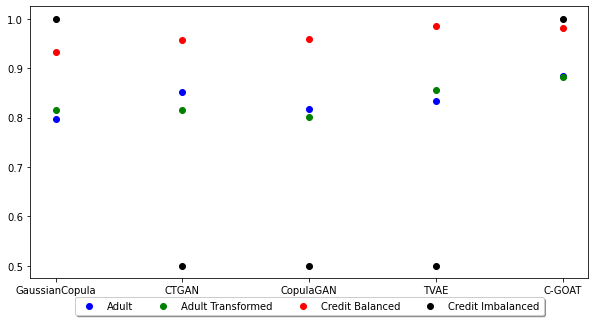

In [123]:
metric = 'val'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
for key in results.keys():
    if metric in key:
        color_ = colors[key.replace('_' + metric, "")]
        ax1.scatter(results[key]['Method'], results[key]['AUC'], color = color_, label=key.replace('_' + metric, ""))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()
plt.close()

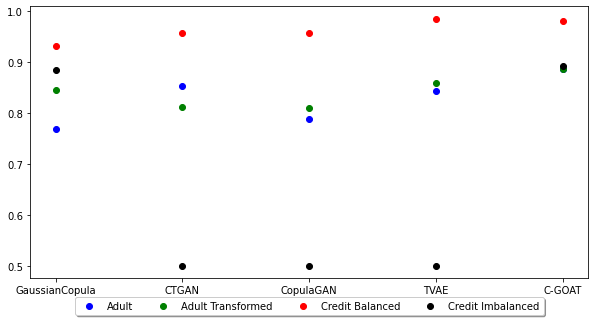

In [124]:
metric = 'test'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
for key in results.keys():
    if metric in key:
        color_ = colors[key.replace('_' + metric, "")]
        ax1.scatter(results[key]['Method'], results[key]['AUC'], color = color_, label=key.replace('_' + metric, ""))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()
plt.close()

# Tuned Results 

In [125]:
results = {}

In [126]:
metric = 'val'
data_set = tuned_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  tuned_adult
metric:  val


In [127]:
metric = 'test'
data_set = tuned_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  tuned_adult
metric:  test


In [128]:
metric = 'val'
data_set = tuned_encoded_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  encoded_tuned_adult
metric:  val


In [129]:
metric = 'test'
data_set = tuned_encoded_adut_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  encoded_tuned_adult
metric:  test


In [130]:
metric = 'val'
data_set = tuned_balanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  balanced_tuned_credit_card
metric:  val


In [131]:
metric = 'test'
data_set = tuned_balanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  balanced_tuned_credit_card
metric:  test


In [132]:
metric = 'val'
data_set = tuned_imbalanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  imbalanced_tuned_credit_card
metric:  val


In [133]:
metric = 'test'
data_set = tuned_imbalanced_credit_card_data_set
print('data_set: ', data_set)
print('metric: ', metric)
results[data_set + "_" + metric] = generateDataFrameAllModelsResults(data_set, metric)

data_set:  imbalanced_tuned_credit_card
metric:  test


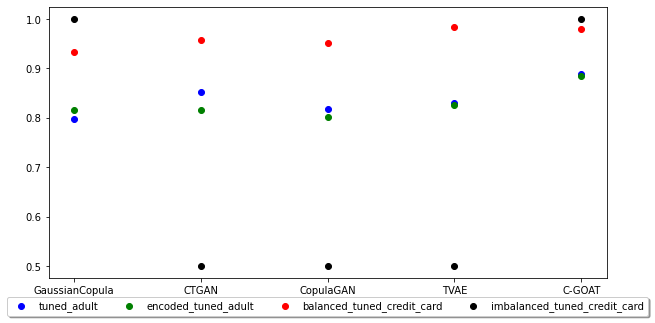

In [134]:
metric = 'val'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
for key in results.keys():
    if metric in key:
        color_ = colors[key.replace('_' + metric, "")]
        ax1.scatter(results[key]['Method'], results[key]['AUC'], color = color_, label=key.replace('_' + metric, ""))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()
plt.close()

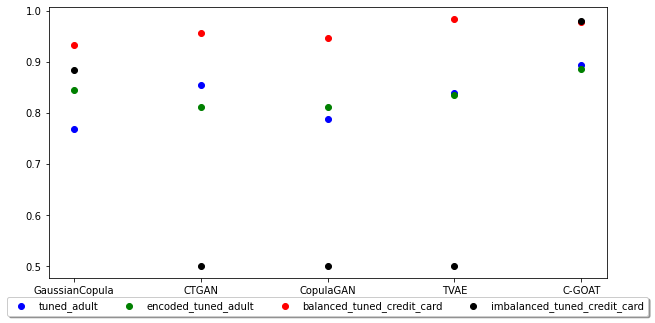

In [135]:
metric = 'test'
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
for key in results.keys():
    if metric in key:
        color_ = colors[key.replace('_' + metric, "")]
        ax1.scatter(results[key]['Method'], results[key]['AUC'], color = color_, label=key.replace('_' + metric, ""))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.show()
plt.close()

In [136]:
metric = 'val'
columns_needed_individual_models = ['data_set_full_name', 'clf_auc_' + metric + '_gaussain_copula', 'clf_auc_' + metric + '_ct_gan', 'clf_auc_' + metric + '_copula_gan', 'clf_auc_' + metric + '_tvae']
df_temp_ = df_all_results_individual_models_performance[columns_needed_individual_models]

In [137]:
df_temp_
df_gaussain_copula_results = df_temp_[['data_set_full_name', 'clf_auc_val_gaussain_copula']]
df_ct_gan_results = df_temp_[['data_set_full_name', 'clf_auc_val_ct_gan']]
df_copula_gan_results = df_temp_[['data_set_full_name', 'clf_auc_val_copula_gan']]
df_tvae_results = df_temp_[['data_set_full_name', 'clf_auc_val_tvae']]
df_tvae_results
df_gaussain_copula_results_tuned = df_gaussain_copula_results.loc[df_gaussain_copula_results['data_set_full_name'].isin(['adult', 'encoded_adult', 'unbalanced_credit_card', 'balanced_credit_card'])]

In [138]:
df_gaussain_copula_results_tuned 

,data_set_full_name,clf_auc_val_gaussain_copula


In [139]:
columns_needed_our_method = ['data_set_full_name', metric + '_roc']
df_temp_our_method = df_all_results_best_params[columns_needed_our_method]
df_temp_our_method

,data_set_full_name,val_roc
0,Adult,0.885191
1,Adult Transformed,0.881387
2,Credit Imbalanced,1.000000
3,Credit Balanced,0.981566
4,tuned_adult,0.889318
5,encoded_tuned_adult,0.884775
6,imbalanced_tuned_credit_card,0.999980
7,balanced_tuned_credit_card,0.979080


In [140]:
#color for method
#x-axis for data set

In [141]:
#Another approach
def generateDataFrameAllModelsResults(metric:str, tuned:bool):
    columns_needed_individual_models = ['data_set_full_name', 'clf_auc_' + metric + '_gaussain_copula', 'clf_auc_' + metric + '_ct_gan', 'clf_auc_' + metric + '_copula_gan', 'clf_auc_' + metric + '_tvae']
    df_temp_individual_models = df_all_results_individual_models_performance[columns_needed_individual_models]
    columns_needed_our_method = ['data_set_full_name', metric + '_roc']
    df_temp_our_method = df_all_results_best_params[columns_needed_our_method]
    df_gaussain_copula_results = df_temp_individual_models[['data_set_full_name', 'clf_auc_'+ metric + '_gaussain_copula']]
    df_ct_gan_results = df_temp_individual_models[['data_set_full_name', 'clf_auc_'+ metric + '_ct_gan']]
    df_copula_gan_results = df_temp_individual_models[['data_set_full_name', 'clf_auc_'+ metric + '_copula_gan']]
    df_tvae_results = df_temp_individual_models[['data_set_full_name', 'clf_auc_'+ metric + '_tvae']]
    dict_results = {}

    
    if tuned:
        datasets = [tuned_adut_data_set, tuned_encoded_adut_data_set, tuned_balanced_credit_card_data_set, tuned_imbalanced_credit_card_data_set]
        df_gaussain_copula_results = df_gaussain_copula_results.loc[df_gaussain_copula_results['data_set_full_name'].isin(datasets)]
        df_ct_gan_results = df_ct_gan_results.loc[df_ct_gan_results['data_set_full_name'].isin(datasets)]
        df_copula_gan_results = df_copula_gan_results.loc[df_copula_gan_results['data_set_full_name'].isin(datasets)]
        df_tvae_results = df_tvae_results.loc[df_tvae_results['data_set_full_name'].isin(datasets)]
        df_temp_our_method = df_temp_our_method.loc[df_temp_our_method['data_set_full_name'].isin(datasets)]
        dict_results[model_TunedCTGAN] = df_ct_gan_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_ct_gan' : 'AUC'})
        dict_results[model_TunedCopulaGAN] = df_copula_gan_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_copula_gan' : 'AUC'})
        dict_results[model_TunedTVAE] = df_tvae_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_tvae' : 'AUC'})
        dict_results[model_SCGOAT] = df_temp_our_method.rename(columns={'data_set_full_name' : 'data_set', metric + '_roc' : 'AUC'})
        datasets = [adut_data_set, encoded_adut_data_set, balanced_credit_card_data_set, imbalanced_credit_card_data_set]
        dict_results[model_TunedCTGAN].data_set = datasets
        dict_results[model_TunedCopulaGAN].data_set = datasets
        dict_results[model_TunedTVAE].data_set = datasets
        dict_results[model_SCGOAT].data_set = datasets
    else:
        datasets = [adut_data_set, encoded_adut_data_set, balanced_credit_card_data_set, imbalanced_credit_card_data_set]
        df_gaussain_copula_results = df_gaussain_copula_results.loc[df_gaussain_copula_results['data_set_full_name'].isin(datasets)]
        df_ct_gan_results = df_ct_gan_results.loc[df_ct_gan_results['data_set_full_name'].isin(datasets)]
        df_copula_gan_results = df_copula_gan_results.loc[df_copula_gan_results['data_set_full_name'].isin(datasets)]
        df_tvae_results = df_tvae_results.loc[df_tvae_results['data_set_full_name'].isin(datasets)]
        df_temp_our_method = df_temp_our_method.loc[df_temp_our_method['data_set_full_name'].isin(datasets)]
        
        dict_results[model_GaussianCopula] = df_gaussain_copula_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_gaussain_copula' : 'AUC'})
        dict_results[model_CTGAN] = df_ct_gan_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_ct_gan' : 'AUC'})
        dict_results[model_CopulaGAN] = df_copula_gan_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_copula_gan' : 'AUC'})
        dict_results[model_TVAE] = df_tvae_results.rename(columns={'data_set_full_name' : 'data_set', 'clf_auc_' + metric + '_tvae' : 'AUC'})
        dict_results[model_CGOAT] = df_temp_our_method.rename(columns={'data_set_full_name' : 'data_set', metric + '_roc' : 'AUC'})
        
        datasets = [adut_data_set, encoded_adut_data_set, balanced_credit_card_data_set, imbalanced_credit_card_data_set]
        dict_results[model_GaussianCopula].data_set = datasets
        dict_results[model_CTGAN].data_set = datasets
        dict_results[model_CopulaGAN].data_set = datasets
        dict_results[model_TVAE].data_set = datasets
        dict_results[model_CGOAT].data_set = datasets
    
    return dict_results

In [142]:
results_untuned_val = generateDataFrameAllModelsResults('val', False)

In [143]:
results_untuned_test = generateDataFrameAllModelsResults('test', False)

In [144]:
results_tuned_val = generateDataFrameAllModelsResults('val', True)

In [145]:
results_tuned_test = generateDataFrameAllModelsResults('test', True)

In [130]:
# colors_methods = {model_GaussianCopula : 'b', model_CTGAN : 'g', model_CopulaGAN : 'r', model_TVAE : 'y', model_CGOAT : 'k',
#          model_TunedCTGAN : 'g', model_TunedCopulaGAN : 'r', model_TunedTVAE : 'y', model_SCGOAT : 'k'}
model_our_method = 'Our method'
colors_methods = {model_GaussianCopula : '#1A2229', model_CTGAN : '#645552', model_CopulaGAN : '#3F4F37', model_TVAE : '#A76B47', model_CGOAT : '#BCA734',
         model_TunedCTGAN : '#645552', model_TunedCopulaGAN : '#3F4F37', model_TunedTVAE : '#A76B47', model_SCGOAT : '#BCA734', model_our_method : '#BCA734'}

In [147]:
results_untuned_test

{'GaussianCopula':             data_set       AUC
 0              Adult  0.767879
 1  Adult Transformed  0.844834
 2    Credit Balanced  0.883756
 3  Credit Imbalanced  0.931923,
 'CTGAN':             data_set       AUC
 0              Adult  0.853426
 1  Adult Transformed  0.811518
 2    Credit Balanced  0.500000
 3  Credit Imbalanced  0.956412,
 'CopulaGAN':             data_set       AUC
 0              Adult  0.788476
 1  Adult Transformed  0.810472
 2    Credit Balanced  0.500000
 3  Credit Imbalanced  0.956424,
 'TVAE':             data_set       AUC
 0              Adult  0.842977
 1  Adult Transformed  0.859379
 2    Credit Balanced  0.500000
 3  Credit Imbalanced  0.985020,
 'C-GOAT':             data_set       AUC
 0              Adult  0.885859
 1  Adult Transformed  0.886303
 2    Credit Balanced  0.891409
 3  Credit Imbalanced  0.980266}

In [148]:
#results CTGAN+
datasets = [adut_data_set, encoded_adut_data_set, balanced_credit_card_data_set, imbalanced_credit_card_data_set]
ctgan_plus_auc_test_adult = 0.8614
ctgan_plus_auc_test_ecnoded_adult = 0.8341
ctgan_plus_auc_test_balanced_credit = 0.981
ctgan_plus_auc_test_imbalanced_credit = 0.9267
ctgan_plus_auc_test_results = pd.DataFrame({'data' : datasets, 'AUC' : [ctgan_plus_auc_test_adult, ctgan_plus_auc_test_ecnoded_adult, ctgan_plus_auc_test_balanced_credit, ctgan_plus_auc_test_imbalanced_credit]})
ctgan_plus_auc_test_results

,data,AUC
0,Adult,0.8614
1,Adult Transformed,0.8341
2,Credit Balanced,0.9810
3,Credit Imbalanced,0.9267


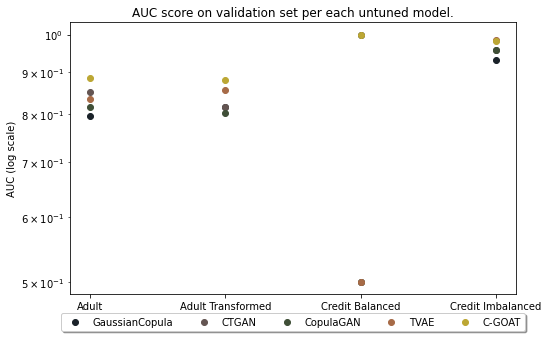

In [149]:
plt.figure(figsize=(8, 5))
for key in results_untuned_val.keys():
    color_ = colors_methods[key]
    plt.scatter(results_untuned_val[key]['data_set'], results_untuned_val[key]['AUC'], color = color_, label=key)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylabel("AUC (log scale)")
# plt.ylim([0.75, 1.01])
plt.title("AUC score on validation set per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_validation.jpg", bbox_inches='tight')
plt.show()
plt.close()

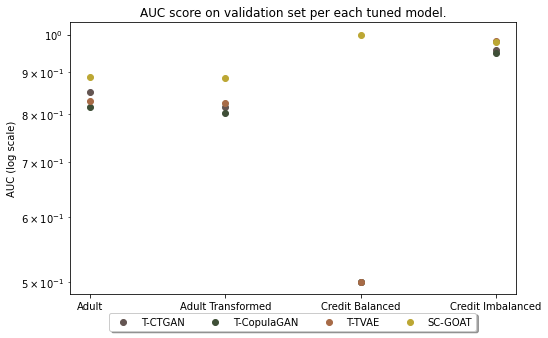

In [150]:
plt.figure(figsize=(8, 5))
for key in results_tuned_val.keys():
    color_ = colors_methods[key]
    plt.scatter(results_tuned_val[key]['data_set'], results_tuned_val[key]['AUC'], color = color_, label=key)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylabel("AUC (log scale)")
# plt.ylim([0.825, 1.01])
plt.title("AUC score on validation set per each tuned model.")
plt.savefig("../data/figures/results_tuned_models_validation.jpg", bbox_inches='tight')
plt.show()
plt.close()

In [151]:
results_untuned_test

{'GaussianCopula':             data_set       AUC
 0              Adult  0.767879
 1  Adult Transformed  0.844834
 2    Credit Balanced  0.883756
 3  Credit Imbalanced  0.931923,
 'CTGAN':             data_set       AUC
 0              Adult  0.853426
 1  Adult Transformed  0.811518
 2    Credit Balanced  0.500000
 3  Credit Imbalanced  0.956412,
 'CopulaGAN':             data_set       AUC
 0              Adult  0.788476
 1  Adult Transformed  0.810472
 2    Credit Balanced  0.500000
 3  Credit Imbalanced  0.956424,
 'TVAE':             data_set       AUC
 0              Adult  0.842977
 1  Adult Transformed  0.859379
 2    Credit Balanced  0.500000
 3  Credit Imbalanced  0.985020,
 'C-GOAT':             data_set       AUC
 0              Adult  0.885859
 1  Adult Transformed  0.886303
 2    Credit Balanced  0.891409
 3  Credit Imbalanced  0.980266}

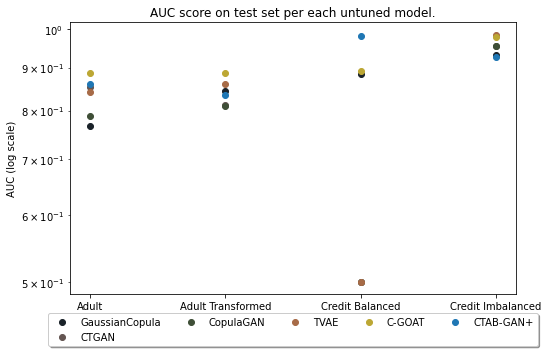

In [152]:
plt.figure(figsize=(8, 5))
for key in results_untuned_test.keys():
    color_ = colors_methods[key]
    plt.scatter(results_untuned_test[key]['data_set'], results_untuned_test[key]['AUC'], color = color_, label=key)
plt.scatter(ctgan_plus_auc_test_results['data'], ctgan_plus_auc_test_results['AUC'],label='CTAB-GAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
# plt.ylim([0.7, 1.0])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on test set per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_test.jpg", bbox_inches='tight')
plt.show()
plt.close()

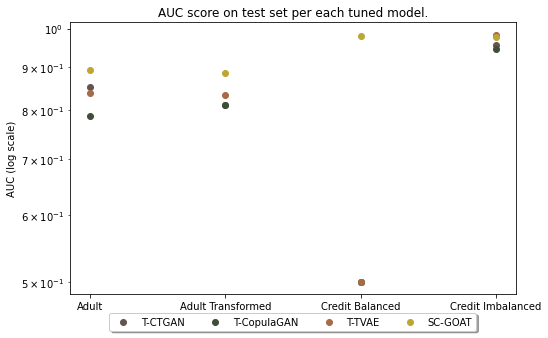

In [153]:
plt.figure(figsize=(8, 5))
for key in results_tuned_test.keys():
    color_ = colors_methods[key]
    plt.scatter(results_tuned_test[key]['data_set'], results_tuned_test[key]['AUC'], color = color_, label=key)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylabel("AUC (log scale)")
# plt.ylim([0.7, 1.0])
plt.title("AUC score on test set per each tuned model.")
plt.savefig("../data/figures/results_tuned_models_test.jpg", bbox_inches='tight')
plt.show()
plt.close()

# Results Section Final

In [154]:
import pandas as pd
import os
ldname = ['adult', 'encoded_adult', 'balanced_credit_card', 'unbalanced_credit_card']
lmname =['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
df_alphas = pd.DataFrame()

for m_name in ldname:
    for method_name in lmname:
        fname = "../data/output/ES10/" + m_name + "_" + method_name + "_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        ltuned = [df.loc['tuned_val_roc', 'Value'], df.loc['tuned_test_roc', 'Value']]
        luntuned = [df.loc['untuned_val_roc', 'Value'], df.loc['untuned_test_roc', 'Value']]
        lmodel =[method_name, method_name]
        ldata = [m_name, m_name]
        lset = ['val', 'test']
        dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
                index = ['data', 'model', 'set', 'untuned', 'tuned']).T])
    
    alphas_untuned = None
    alphas_tuned = None
    for t in ['tuned', 'untuned']:
        fname = "../data/output/ES10/" + m_name + "_" + t + '_' +  "models_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname)
        if t == 'tuned':
            ltuned = [df['val_roc'], df['test_roc']]
            alphas_tuned_temp = [df['alpha_1'], df['alpha_2'], df['alpha_3'], df['alpha_4']]
            alphas_tuned_ = [alphas_tuned_temp[i].values[0] for i in range(len(alphas_tuned_temp))]
            scale = sum(alphas_tuned_)
            alphas_tuned = [round((100 / 1) * alphas_tuned_[i], 2) for i in range(len(alphas_tuned_temp))]
        else:
            luntuned = [df['val_roc'], df['test_roc']]
            alphas_untuned_temp = [df['alpha_1'], df['alpha_2'], df['alpha_3'], df['alpha_4']]
            alphas_untuned_ = [alphas_untuned_temp[i].values[0] for i in range(len(alphas_untuned_temp))]
            scale = sum(alphas_untuned_)
            alphas_untuned = [round((100 / 1) * alphas_untuned_[i], 2) for i in range(len(alphas_untuned_temp))]
        
    
        lmodel =['SC-GOAT', 'SC_GOAT']
        ldata = [m_name, m_name]
        lset = ['val', 'test']
#         print('alphas_untuned', alphas_untuned)
#         df_alphas = pd.concat([df_alphas, pd.DataFrame([ldata, lmodel, 'False', alphas_untuned[0], alphas_untuned[1], alphas_untuned[2], alphas_untuned[3]], 
#                                                  index = ['data', 'model', 'tuned', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4']).T])
#         df_alphas = pd.concat([df_alphas, pd.DataFrame([ldata, lmodel, 'True', alphas_tuned[0], alphas_tuned[1], alphas_tuned[2], alphas_tuned[3]], 
#                                                  index = ['data', 'model', 'tuned', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4']).T])
        dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
                index = ['data', 'model', 'set', 'untuned', 'tuned']).T])
    print("=================")
    print('m_name: ', m_name)
    print('untuned: ', True)
    print('alphas_untuned: ', alphas_untuned)
    print('tuned: ', True)
    print('alphas_tuned: ', alphas_tuned)
    print("=================")

m_name:  adult
untuned:  True
alphas_untuned:  [0.05, 45.21, 36.93, 17.8]
tuned:  True
alphas_tuned:  [5.59, 39.18, 31.23, 24.01]
m_name:  encoded_adult
untuned:  True
alphas_untuned:  [23.95, 35.63, 9.88, 30.54]
tuned:  True
alphas_tuned:  [32.26, 24.97, 7.88, 34.89]
m_name:  balanced_credit_card
untuned:  True
alphas_untuned:  [25.69, 0.02, 7.96, 66.33]
tuned:  True
alphas_tuned:  [46.25, 9.17, 3.02, 41.56]
m_name:  unbalanced_credit_card
untuned:  True
alphas_untuned:  [45.12, 40.56, 0.33, 13.99]
tuned:  True
alphas_tuned:  [50.49, 9.66, 0.0, 39.85]


In [155]:
ldname = ['adult', 'encoded_adult', 'balanced_credit_card', 'unbalanced_credit_card']
lmname =['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()

for m_name in ldname:
    for method_name in lmname:
        fname = "../data/output/ES10/" + m_name + "_" + method_name + "_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        ltuned = [df.loc['tuned_val_roc', 'Value'], df.loc['tuned_test_roc', 'Value']]
        luntuned = [df.loc['untuned_val_roc', 'Value'], df.loc['untuned_test_roc', 'Value']]
        lmodel =[method_name, method_name]
        ldata = [m_name, m_name]
        lset = ['val', 'test']
        dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
                index = ['data', 'model', 'set', 'untuned', 'tuned']).T])

    for t in ['tuned', 'untuned']:
        fname = "../data/output/ES10/" + m_name + "_" + t + '_' +  "models_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        
        if t == 'tuned':
            ltuned = [df['val_roc'], df['test_roc']]
        else:
            luntuned = [df['val_roc'], df['test_roc']]
    lmodel =['SC-GOAT', 'SC_GOAT']
    ldata = [m_name, m_name]
    lset = ['val', 'test']
    dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
            index = ['data', 'model', 'set', 'untuned', 'tuned']).T])
dfres

,data,model,set,untuned,tuned
0,adult,GaussianCopula,val,0.796764,0.796764
1,adult,GaussianCopula,test,0.767879,0.767879
0,adult,CTGAN,val,0.8512294283421163,0.8512294283421163
1,adult,CTGAN,test,0.8534260029099979,0.8534260029099979
0,adult,CopulaGAN,val,0.816750409884609,0.816750409884609
1,adult,CopulaGAN,test,0.7884761484098939,0.7884761484098939
0,adult,TVAE,val,0.830292,0.834362
1,adult,TVAE,test,0.838562,0.842977
0,adult,SC-GOAT,val,"alpha_1 0.000534 0.885191 Name: val_roc, dt...","alpha_1 0.05587 0.889318 Name: val_roc, dty..."
1,adult,SC_GOAT,test,"alpha_1 0.000534 0.885859 Name: test_roc, d...","alpha_1 0.05587 0.893997 Name: test_roc, dt..."


In [156]:
df_alphas

""


In [157]:
if t == 'tuned':
    ltuned = [df['val_roc'], df['test_roc']]
else:
    luntuned = [df['val_roc'], df['test_roc']]

In [158]:
dfres.tuned = dfres.tuned.astype(float)
dfres.untuned = dfres.untuned.astype(float)
dfres['diff'] = dfres['tuned'] - dfres['untuned']

In [159]:
data_sets = ['Adult', 'Adult Transformed', 'Credit Balanced', 'Credit Imbalanced']

### Results Untuned

In [160]:
columns_needed_untuned = ['data', 'model', 'set', 'untuned']

In [161]:
#     df_temp_individual_models = df_temp_individual_models.loc[df_all_results_individual_models_performance['data_set_full_name']==data_set]
df_results_untuned_val = dfres.loc[dfres['set'] == 'val'][columns_needed_untuned]
df_results_untuned_test = dfres.loc[dfres['set'] == 'test'][columns_needed_untuned]

In [162]:
columns_needed_untuned_model = ['data', 'untuned']
df_results_untuned_val_GaussianCopula = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'GaussianCopula'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_val_CTGAN = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'CTGAN'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_val_CopulaGAN = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'CopulaGAN'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_val_TVAE = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'TVAE'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_val_SC_GOAT = df_results_untuned_val.loc[df_results_untuned_val['model'] == 'SC-GOAT'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})

df_results_untuned_test_GaussianCopula = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'GaussianCopula'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_test_CTGAN = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'CTGAN'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_test_CopulaGAN = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'CopulaGAN'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_test_TVAE = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'TVAE'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})
df_results_untuned_test_SC_GOAT = df_results_untuned_test.loc[df_results_untuned_test['model'] == 'SC_GOAT'][columns_needed_untuned_model].rename(columns={'untuned' : 'AUC'})

In [163]:
df_results_untuned_test_SC_GOAT.AUC = [0.885859, 0.886303, 0.980266, 0.979161]

In [164]:
df_results_untuned_test_SC_GOAT

,data,AUC
1,adult,0.885859
1,encoded_adult,0.886303
1,balanced_credit_card,0.980266
1,unbalanced_credit_card,0.979161


In [165]:
dict_results_untuned_val = {}
dict_results_untuned_val[model_TunedCTGAN] = df_results_untuned_val_CTGAN
dict_results_untuned_val[model_TunedCopulaGAN] = df_results_untuned_val_CopulaGAN
dict_results_untuned_val[model_TunedTVAE] = df_results_untuned_val_TVAE
dict_results_untuned_val[model_CGOAT] = df_results_untuned_val_SC_GOAT
dict_results_untuned_val[model_TunedCTGAN].data = datasets
dict_results_untuned_val[model_TunedCopulaGAN].data = datasets
dict_results_untuned_val[model_TunedTVAE].data = datasets
dict_results_untuned_val[model_CGOAT].data = datasets

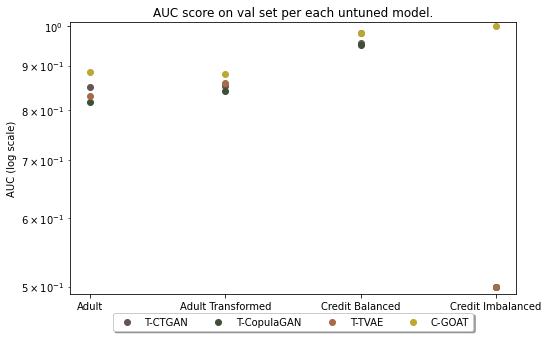

In [166]:
plt.figure(figsize=(8, 5))
for key in dict_results_untuned_val.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_untuned_val[key]['data'], dict_results_untuned_val[key]['AUC'], color = color_, label=key)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylim([0.49, 1.01])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on val set per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_val.jpg", bbox_inches='tight')
plt.show()
plt.close()

In [167]:
dict_results_untuned_test = {}
dict_results_untuned_test[model_TunedCTGAN] = df_results_untuned_test_CTGAN
dict_results_untuned_test[model_TunedCopulaGAN] = df_results_untuned_test_CopulaGAN
dict_results_untuned_test[model_TunedTVAE] = df_results_untuned_test_TVAE
dict_results_untuned_test[model_CGOAT] = df_results_untuned_test_SC_GOAT
dict_results_untuned_test[model_TunedCTGAN].data = datasets
dict_results_untuned_test[model_TunedCopulaGAN].data = datasets
dict_results_untuned_test[model_TunedTVAE].data = datasets
dict_results_untuned_test[model_CGOAT].data = datasets

In [168]:
df_results_untuned_test_CTGAN

,data,AUC
1,Adult,0.853426
1,Adult Transformed,0.811650
1,Credit Balanced,0.956412
1,Credit Imbalanced,0.500000


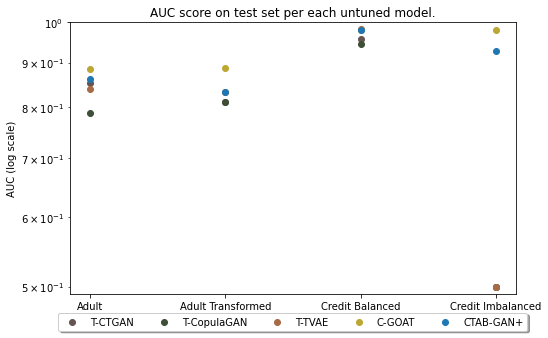

In [169]:
plt.figure(figsize=(8, 5))
for key in dict_results_untuned_test.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_untuned_test[key]['data'], dict_results_untuned_test[key]['AUC'], color = color_, label=key)
plt.scatter(ctgan_plus_auc_test_results['data'], ctgan_plus_auc_test_results['AUC'],label='CTAB-GAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylim([0.49, 1.0])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on test set per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_test.jpg", bbox_inches='tight')
plt.show()
plt.close()

### Results Tuned

In [170]:
columns_needed_tuned = ['data', 'model', 'set', 'tuned']

In [171]:
df_results_tuned_val = dfres.loc[dfres['set'] == 'val'][columns_needed_tuned]
df_results_tuned_test = dfres.loc[dfres['set'] == 'test'][columns_needed_tuned]

In [172]:
columns_needed_tuned_model = ['data', 'tuned']
df_results_tuned_val_GaussianCopula = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'GaussianCopula'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_val_CTGAN = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'CTGAN'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_val_CopulaGAN = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'CopulaGAN'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_val_TVAE = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'TVAE'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_val_SC_GOAT = df_results_tuned_val.loc[df_results_untuned_val['model'] == 'SC-GOAT'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})

df_results_tuned_test_GaussianCopula = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'GaussianCopula'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_test_CTGAN = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'CTGAN'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_test_CopulaGAN = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'CopulaGAN'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_test_TVAE = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'TVAE'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})
df_results_tuned_test_SC_GOAT = df_results_tuned_test.loc[df_results_tuned_test['model'] == 'SC_GOAT'][columns_needed_tuned_model].rename(columns={'tuned' : 'AUC'})

In [173]:
df_results_tuned_test_SC_GOAT

,data,AUC
1,adult,0.893997
1,encoded_adult,0.886312
1,balanced_credit_card,0.976695
1,unbalanced_credit_card,0.979161


In [174]:
dict_results_tuned_val = {}
dict_results_tuned_val[model_TunedCTGAN] = df_results_tuned_val_CTGAN
dict_results_tuned_val[model_TunedCopulaGAN] = df_results_tuned_val_CopulaGAN
dict_results_tuned_val[model_TunedTVAE] = df_results_tuned_val_TVAE
dict_results_tuned_val[model_SCGOAT] = df_results_tuned_val_SC_GOAT

dict_results_tuned_val[model_TunedCTGAN].data = datasets
dict_results_tuned_val[model_TunedCopulaGAN].data = datasets
dict_results_tuned_val[model_TunedTVAE].data = datasets
dict_results_tuned_val[model_SCGOAT].data = datasets

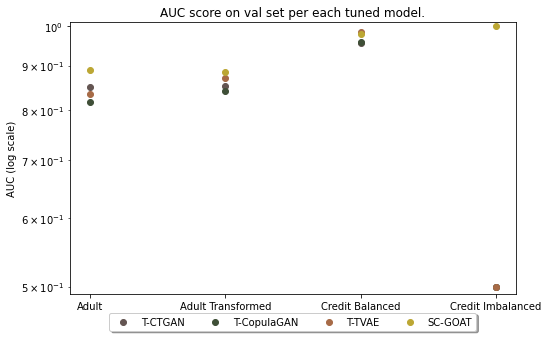

In [175]:
plt.figure(figsize=(8, 5))
for key in dict_results_tuned_val.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_tuned_val[key]['data'], dict_results_tuned_val[key]['AUC'], color = color_, label=key)
# plt.scatter(ctgan_plus_auc_test_results['data_set'], ctgan_plus_auc_test_results['AUC'],label='CTAB-GAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylim([0.49, 1.01])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on val set per each tuned model.")
plt.savefig("../data/figures/results_tuned_models_val.jpg", bbox_inches='tight')
plt.show()
plt.close()

In [176]:
dict_results_tuned_test = {}
dict_results_tuned_test[model_TunedCTGAN] = df_results_tuned_test_CTGAN
dict_results_tuned_test[model_TunedCopulaGAN] = df_results_tuned_test_CopulaGAN
dict_results_tuned_test[model_TunedTVAE] = df_results_tuned_test_TVAE
dict_results_tuned_test[model_SCGOAT] = df_results_tuned_test_SC_GOAT

dict_results_tuned_test[model_TunedCTGAN].data = datasets
dict_results_tuned_test[model_TunedCopulaGAN].data = datasets
dict_results_tuned_test[model_TunedTVAE].data = datasets
dict_results_tuned_test[model_SCGOAT].data = datasets

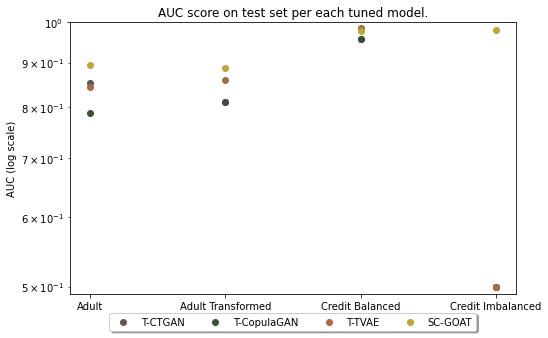

In [177]:
plt.figure(figsize=(8, 5))
for key in dict_results_tuned_test.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_tuned_test[key]['data'], dict_results_tuned_test[key]['AUC'], color = color_, label=key)
# plt.scatter(ctgan_plus_auc_test_results['data_set'], ctgan_plus_auc_test_results['AUC'],label='CTAB-GAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
plt.ylim([0.49 , 1.0])
plt.ylabel("AUC (log scale)")
plt.title("AUC score on test set per each tuned model.")
plt.savefig("../data/figures/results_tuned_models_test.jpg", bbox_inches='tight')
plt.show()
plt.close()

# Description of Synthetic Data 

In [178]:
def getSyntheticDataDescription(data_set, target_column):

    CopulaGAN_untuned = pd.read_csv(directory_name_output + data_set + '_untuned_CopulaGAN_synthetic_data_xgboost.csv')
    CTGAN_untuned = pd.read_csv(directory_name_output + data_set + '_untuned_CTGAN_synthetic_data_xgboost.csv')
    GaussianCopula_untuned = pd.read_csv(directory_name_output + data_set + '_untuned_GaussianCopula_synthetic_data_xgboost.csv')
    TVAE_untuned = pd.read_csv(directory_name_output + data_set + '_untuned_TVAE_synthetic_data_xgboost.csv')
    OurMETHOD_untuned = pd.read_csv(directory_name_output + data_set + '_untuned_models_synthetic_data_xgboost.csv')

    if 'adult' in data_set:
        OurMETHOD_untuned.loc[OurMETHOD_untuned[target_column] == " <=50K", target_column] = 0
        OurMETHOD_untuned.loc[OurMETHOD_untuned[target_column] == " >50K", target_column] = 1

    target_0_CopulaGAN_untuned = (sum(len(CopulaGAN_untuned) - CopulaGAN_untuned[target_column])) / len(CopulaGAN_untuned)
    target_1_CopulaGAN_untuned = sum(CopulaGAN_untuned[target_column]) / len(CopulaGAN_untuned)

    target_0_CTGAN_untuned = (len(CTGAN_untuned) - sum(CTGAN_untuned[target_column])) / len(CTGAN_untuned)
    target_1_CTGAN_untuned = sum(CTGAN_untuned[target_column]) / len(CTGAN_untuned)

    target_0_CopulaGAN_untuned = (len(CopulaGAN_untuned) - sum(CopulaGAN_untuned[target_column])) / len(CopulaGAN_untuned)
    target_1_CopulaGAN_untuned = sum(CopulaGAN_untuned[target_column]) / len(CopulaGAN_untuned)

    target_0_GaussianCopula_untuned = (len(GaussianCopula_untuned) - sum(GaussianCopula_untuned[target_column])) / len(GaussianCopula_untuned)
    target_1_GaussianCopula_untuned = sum(GaussianCopula_untuned[target_column]) / len(GaussianCopula_untuned)

    target_0_TVAE_untuned = (len(TVAE_untuned) - sum(TVAE_untuned[target_column])) / len(TVAE_untuned)
    target_1_TVAE_untuned = sum(TVAE_untuned[target_column]) / len(TVAE_untuned)

    target_0_OurMETHOD_untuned = (len(OurMETHOD_untuned) - sum(OurMETHOD_untuned[target_column])) / len(OurMETHOD_untuned)
    target_1_OurMETHOD_untuned = sum(OurMETHOD_untuned[target_column]) / len(OurMETHOD_untuned)

    pd_untuned_results = pd.DataFrame({'Method' : ['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE', 'C-GOAT'],
                                      'Target_0' : [target_0_GaussianCopula_untuned, target_0_CTGAN_untuned, target_0_CopulaGAN_untuned, target_0_TVAE_untuned, target_0_OurMETHOD_untuned],
                                      'Target_1' : [target_1_GaussianCopula_untuned, target_1_CTGAN_untuned, target_1_CopulaGAN_untuned, target_1_TVAE_untuned, target_1_OurMETHOD_untuned],})

    # Tuned
    CopulaGAN_tuned = pd.read_csv(directory_name_output + data_set + '_tuned_CopulaGAN_synthetic_data_xgboost.csv')
    CTGAN_tuned = pd.read_csv(directory_name_output + data_set + '_tuned_CTGAN_synthetic_data_xgboost.csv')
    GaussianCopula_tuned = pd.read_csv(directory_name_output + data_set + '_tuned_GaussianCopula_synthetic_data_xgboost.csv')
    TVAE_tuned = pd.read_csv(directory_name_output + data_set + '_tuned_TVAE_synthetic_data_xgboost.csv')
    OurMETHOD_tuned = pd.read_csv(directory_name_output + data_set + '_tuned_models_synthetic_data_xgboost.csv')

    if 'adult' in data_set:
        OurMETHOD_tuned.loc[OurMETHOD_tuned[target_column] == " <=50K", target_column] = 0
        OurMETHOD_tuned.loc[OurMETHOD_tuned[target_column] == " >50K", target_column] = 1

    target_0_CopulaGAN_tuned = (len(CopulaGAN_tuned) - sum(CopulaGAN_tuned[target_column])) / len(CopulaGAN_tuned)
    target_1_CopulaGAN_tuned = sum(CopulaGAN_tuned[target_column]) / len(CopulaGAN_tuned)

    target_0_CTGAN_tuned = (len(CTGAN_tuned) - sum(CTGAN_tuned[target_column])) / len(CTGAN_tuned)
    target_1_CTGAN_tuned = sum(CTGAN_tuned[target_column]) / len(CTGAN_tuned)

    target_0_CopulaGAN_tuned = (len(CopulaGAN_tuned) - sum(CopulaGAN_tuned[target_column])) / len(CopulaGAN_tuned)
    target_1_CopulaGAN_tuned = sum(CopulaGAN_tuned[target_column]) / len(CopulaGAN_tuned)

    target_0_GaussianCopula_tuned = (len(GaussianCopula_tuned) - sum(GaussianCopula_tuned[target_column])) / len(GaussianCopula_tuned)
    target_1_GaussianCopula_tuned = sum(GaussianCopula_tuned[target_column]) / len(GaussianCopula_tuned)

    target_0_TVAE_tuned = (len(TVAE_tuned) - sum(TVAE_tuned[target_column])) / len(TVAE_tuned)
    target_1_TVAE_tuned = sum(TVAE_tuned[target_column]) / len(TVAE_tuned)

    target_0_OurMETHOD_tuned = (len(OurMETHOD_tuned) - sum(OurMETHOD_tuned[target_column])) / len(OurMETHOD_tuned)
    target_1_OurMETHOD_tuned = sum(OurMETHOD_tuned[target_column]) / len(OurMETHOD_tuned)

    pd_tuned_results = pd.DataFrame({'Method' : ['T-GaussianCopula', 'T-CTGAN', 'CopulaGAN', 'T-TVAE', 'SC-GOAT'],
                                      'Target_0' : [target_0_GaussianCopula_tuned, target_0_CTGAN_tuned, target_0_CopulaGAN_tuned, target_0_TVAE_tuned, target_0_OurMETHOD_tuned],
                                      'Target_1' : [target_1_GaussianCopula_tuned, target_1_CTGAN_tuned, target_1_CopulaGAN_tuned, target_1_TVAE_tuned, target_1_OurMETHOD_tuned],})

    return pd_untuned_results, pd_tuned_results


In [179]:
# Adult
data_set = 'adult'
target_column = 'income'
pd_untuned_results, pd_tuned_results = getSyntheticDataDescription(data_set, target_column)

In [180]:
pd_untuned_results.head()

,Method,Target_0,Target_1
0,GaussianCopula,0.7476,0.2524
1,CTGAN,0.7294,0.2706
2,CopulaGAN,0.8790,0.1210
3,TVAE,0.7717,0.2283
4,C-GOAT,0.7913,0.2087


In [181]:
pd_tuned_results.head()

,Method,Target_0,Target_1
0,T-GaussianCopula,0.7476,0.2524
1,T-CTGAN,0.7294,0.2706
2,CopulaGAN,0.8790,0.1210
3,T-TVAE,0.7611,0.2389
4,SC-GOAT,0.7866,0.2134


In [182]:
# Adult Encoded
data_set = 'encoded_adult'
target_column = 'income'
pd_untuned_results, pd_tuned_results = getSyntheticDataDescription(data_set, target_column)

In [183]:
pd_untuned_results

,Method,Target_0,Target_1
0,GaussianCopula,0.7535,0.2465
1,CTGAN,0.6859,0.3141
2,CopulaGAN,0.8817,0.1183
3,TVAE,0.7266,0.2734
4,C-GOAT,0.7375,0.2625


In [184]:
pd_tuned_results

,Method,Target_0,Target_1
0,T-GaussianCopula,0.7535,0.2465
1,T-CTGAN,0.6859,0.3141
2,CopulaGAN,0.8817,0.1183
3,T-TVAE,0.7584,0.2416
4,SC-GOAT,0.7353,0.2647


In [185]:
# Credit Card Balanced
data_set = 'balanced_credit_card'
target_column = 'Class'
pd_untuned_results, pd_tuned_results = getSyntheticDataDescription(data_set, target_column)

In [186]:
pd_untuned_results

,Method,Target_0,Target_1
0,GaussianCopula,0.9205,0.0795
1,CTGAN,0.7123,0.2877
2,CopulaGAN,0.6714,0.3286
3,TVAE,0.6567,0.3433
4,C-GOAT,0.7341,0.2659


In [187]:
pd_tuned_results

,Method,Target_0,Target_1
0,T-GaussianCopula,0.920500,0.079500
1,T-CTGAN,0.712300,0.287700
2,CopulaGAN,0.654800,0.345200
3,T-TVAE,0.669800,0.330200
4,SC-GOAT,0.783957,0.216043


In [188]:
# Credit Card Imalanced
data_set = 'unbalanced_credit_card'
target_column = 'Class'
pd_untuned_results, pd_tuned_results = getSyntheticDataDescription(data_set, target_column)

In [189]:
pd_untuned_results

,Method,Target_0,Target_1
0,GaussianCopula,0.998200,0.001800
1,CTGAN,1.000000,0.000000
2,CopulaGAN,0.000000,1.000000
3,TVAE,1.000000,0.000000
4,C-GOAT,0.995799,0.004201


In [190]:
pd_tuned_results

,Method,Target_0,Target_1
0,T-GaussianCopula,0.9982,0.0018
1,T-CTGAN,1.0000,0.0000
2,CopulaGAN,0.0000,1.0000
3,T-TVAE,1.0000,0.0000
4,SC-GOAT,0.9992,0.0008


# Collect Results for All Experiments to Compute AVG and STD

In [76]:
import os
print(os.getcwd())
outpath_data_results = "../data/outputResults/"
# outpath_data_results = "../data/outputResults_fit_once/"
prefix_adult_untuned = 'adult_untuned_'
prefix_adult_tuned = 'adult_tuned_'
prefix_adult_encoded_untuned = 'encoded_adult_untuned_'
prefix_adult_encoded_tuned = 'encoded_adult_tuned_'
prefix_balanced_credit_untuned = 'balanced_credit_card_untuned_'
prefix_balanced_credit_tuned = 'balanced_credit_card_tuned_'
prefix_imbalanced_credit_untuned = 'unbalanced_credit_card_untuned_'
prefix_imbalanced_credit_tuned = 'unbalanced_credit_card_tuned_'

/Users/fah33/Bayesian_Synthesizer/code


In [77]:
#UNTUNED RESULTS ADULT
adult_untuned_all_results_AUC_file_name = outpath_data_results + prefix_adult_untuned +  'all_results_AUC_file_name.csv'
adult_untuned_average_std_AUC_file_name = outpath_data_results + prefix_adult_untuned +  'average_std_AUC_file_name.csv'
adult_untuned_all_results_pd = pd.read_csv(adult_untuned_all_results_AUC_file_name)
adult_untuned_average_std_AUC_pd = pd.read_csv(adult_untuned_average_std_AUC_file_name)

# #TUNED RESULTS ADULT
# adult_tuned_all_results_AUC_file_name = outpath_data_results + prefix_adult_tuned +  'all_results_AUC_file_name.csv'
# adult_tuned_average_std_AUC_file_name = outpath_data_results + prefix_adult_tuned +  'average_std_AUC_file_name.csv'
# adult_tuned_all_results_pd = pd.read_csv(adult_tuned_all_results_AUC_file_name)
# adult_tuned_average_std_AUC_pd = pd.read_csv(adult_tuned_average_std_AUC_file_name)

In [78]:
#UNTUNED RESULTS ADULT ENCODED
encoded_adult_untuned_all_results_AUC_file_name = outpath_data_results + prefix_adult_encoded_untuned +  'all_results_AUC_file_name.csv'
encoded_adult_untuned_average_std_AUC_file_name = outpath_data_results + prefix_adult_encoded_untuned +  'average_std_AUC_file_name.csv'
encoded_adult_untuned_all_results_pd = pd.read_csv(adult_encoded_untuned_all_results_AUC_file_name)
encoded_adult_untuned_average_std_AUC_pd = pd.read_csv(adult_encoded_untuned_average_std_AUC_file_name)

# #TUNED RESULTS ADULT ENCODED
# encoded_adult_tuned_all_results_AUC_file_name = outpath_data_results + prefix_adult_encoded_tuned +  'all_results_AUC_file_name.csv'
# encoded_adult_tuned_average_std_AUC_file_name = outpath_data_results + prefix_adult_encoded_tuned +  'average_std_AUC_file_name.csv'
# encoded_adult_tuned_all_results_pd = pd.read_csv(adult_encoded_tuned_all_results_AUC_file_name)
# encoded_adult_tuned_average_std_AUC_pd = pd.read_csv(adult_encoded_tuned_average_std_AUC_file_name)

In [79]:
#UNTUNED RESULTS CREDIT BALANCED
balanced_credit_untuned_all_results_AUC_file_name = outpath_data_results + prefix_balanced_credit_untuned +  'all_results_AUC_file_name.csv'
balanced_credit_untuned_average_std_AUC_file_name = outpath_data_results + prefix_balanced_credit_untuned +  'average_std_AUC_file_name.csv'
balanced_credit_untuned_all_results_pd = pd.read_csv(balanced_credit_untuned_all_results_AUC_file_name)
balanced_credit_untuned_average_std_AUC_pd = pd.read_csv(balanced_credit_untuned_average_std_AUC_file_name)

# #TUNED RESULTS CREDIT BALANCED
# balanced_credit_tuned_all_results_AUC_file_name = outpath_data_results + prefix_balanced_credit_tuned +  'all_results_AUC_file_name.csv'
# balanced_credit_tuned_average_std_AUC_file_name = outpath_data_results + prefix_balanced_credit_tuned +  'average_std_AUC_file_name.csv'
# balanced_credit_tuned_all_results_pd = pd.read_csv(balanced_credit_tuned_all_results_AUC_file_name)
# balanced_credit_tuned_average_std_AUC_pd = pd.read_csv(balanced_credit_tuned_average_std_AUC_file_name)

In [80]:
#UNTUNED RESULTS CREDIT IMBALANCED
imbalanced_credit_untuned_all_results_AUC_file_name = outpath_data_results + prefix_imbalanced_credit_untuned +  'all_results_AUC_file_name.csv'
imbalanced_credit_untuned_average_std_AUC_file_name = outpath_data_results + prefix_imbalanced_credit_untuned +  'average_std_AUC_file_name.csv'
imbalanced_credit_untuned_all_results_pd = pd.read_csv(imbalanced_credit_untuned_all_results_AUC_file_name)
imbalanced_credit_untuned_average_std_AUC_pd = pd.read_csv(imbalanced_credit_untuned_average_std_AUC_file_name)

# #TUNED RESULTS CREDIT IMBALANCED
# imbalanced_credit_tuned_all_results_AUC_file_name = outpath_data_results + prefix_imbalanced_credit_tuned +  'all_results_AUC_file_name.csv'
# imbalanced_credit_tuned_average_std_AUC_file_name = outpath_data_results + prefix_imbalanced_credit_tuned +  'average_std_AUC_file_name.csv'
# imbalanced_credit_tuned_all_results_pd = pd.read_csv(imbalanced_credit_tuned_all_results_AUC_file_name)
# imbalanced_credit_tuned_average_std_AUC_pd = pd.read_csv(imbalanced_credit_tuned_average_std_AUC_file_name)

In [81]:
imbalanced_credit_untuned_average_std_AUC_pd

,methods,average_auc_test,average_auc_val,std_auc_test,std_auc_val
0,our method,0.926983,0.948285,0.073226,0.027494
1,gaussain_copula,0.942290,0.940632,0.063461,0.028215
2,ct_gan,0.500000,0.500000,0.000000,0.000000
3,copula_gan,0.500000,0.500000,0.000000,0.000000
4,tvae,0.500000,0.500000,0.000000,0.000000


In [82]:
#Data Set | Method Name | AVG AUC Untuned | STD AUC Untuned | AVG AUC Tuned | STD AUC Tuned
columns_needed_results_average_std_AUC = ['methods', 'average_auc_test', 'std_auc_test']
df_results_average_std_AUC = pd.DataFrame({'Data Set' : [],  
                                           'Method Name' : [], 
                                           'AVG AUC Untuned' : [],
                                           'STD AUC Untuned' : [],
                                           'AVG AUC Tuned' : [],
                                           'STD AUC Tuned' : [],
                                          })
df_results_average_std_AUC

,Data Set,Method Name,AVG AUC Untuned,STD AUC Untuned,AVG AUC Tuned,STD AUC Tuned


In [83]:
data_set_adult = 'Adult'

# Gaussain Copula
df_untuned = adult_untuned_average_std_AUC_pd.loc[adult_untuned_average_std_AUC_pd['methods'].isin(['gaussain_copula'])]
# df_tuned = adult_tuned_average_std_AUC_pd.loc[adult_tuned_average_std_AUC_pd['methods'].isin(['gaussain_copula'])]

adult_gaussain_copula_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
adult_gaussain_copula_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# adult_gaussain_copula_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# adult_gaussain_copula_std_auc_tuned = df_tuned['std_auc_test'].values[0]

adult_row_adult_gaussain_copula = {'Data Set' : 'Adult', 'Method Name' : 'Gaussain Copula', 
                                           'AVG AUC Untuned' : adult_gaussain_copula_avg_auc_untuned, 'STD AUC Untuned' : adult_gaussain_copula_std_auc_untuned,
                                           'AVG AUC Tuned' : adult_gaussain_copula_avg_auc_untuned, 'STD AUC Tuned' : adult_gaussain_copula_std_auc_untuned}

# CTGAN
df_untuned = adult_untuned_average_std_AUC_pd.loc[adult_untuned_average_std_AUC_pd['methods'].isin(['ct_gan'])]
# df_tuned = adult_tuned_average_std_AUC_pd.loc[adult_tuned_average_std_AUC_pd['methods'].isin(['ct_gan'])]

adult_ct_gan_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
adult_ct_gan_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# adult_ct_gan_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# adult_ct_gan_std_auc_tuned = df_tuned['std_auc_test'].values[0]

adult_row_adult_ct_gan = {'Data Set' : 'Adult', 'Method Name' : 'CTGAN', 
                                           'AVG AUC Untuned' : adult_ct_gan_avg_auc_untuned, 'STD AUC Untuned' : adult_ct_gan_std_auc_untuned,
                                           'AVG AUC Tuned' : adult_ct_gan_avg_auc_untuned, 'STD AUC Tuned' : adult_ct_gan_std_auc_untuned}

# CopulaGAN
df_tuned = adult_untuned_average_std_AUC_pd.loc[adult_untuned_average_std_AUC_pd['methods'].isin(['copula_gan'])]
# df_untuned = adult_tuned_average_std_AUC_pd.loc[adult_tuned_average_std_AUC_pd['methods'].isin(['copula_gan'])]

adult_copula_gan_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
adult_copula_gan_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# adult_copula_gan_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# adult_copula_gan_std_auc_tuned = df_tuned['std_auc_test'].values[0]

adult_row_copula_gan_copula = {'Data Set' : 'Adult', 'Method Name' : 'CopulaGAN', 
                                           'AVG AUC Untuned' : adult_copula_gan_avg_auc_untuned, 'STD AUC Untuned' : adult_copula_gan_std_auc_untuned,
                                           'AVG AUC Tuned' : adult_copula_gan_avg_auc_untuned, 'STD AUC Tuned' : adult_copula_gan_std_auc_untuned}

# TVAE
df_untuned = adult_untuned_average_std_AUC_pd.loc[adult_untuned_average_std_AUC_pd['methods'].isin(['tvae'])]
# df_tuned = adult_tuned_average_std_AUC_pd.loc[adult_tuned_average_std_AUC_pd['methods'].isin(['tvae'])]

adult_tvae_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
adult_tvae_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# adult_tvae_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# adult_tvae_std_auc_tuned = df_tuned['std_auc_test'].values[0]

adult_row_adult_tvae = {'Data Set' : 'Adult', 'Method Name' : 'TVAE', 
                                           'AVG AUC Untuned' : adult_tvae_avg_auc_untuned, 'STD AUC Untuned' : adult_tvae_std_auc_untuned,
                                           'AVG AUC Tuned' : adult_tvae_avg_auc_untuned, 'STD AUC Tuned' : adult_tvae_std_auc_untuned}

# Our Method
df_untuned = adult_untuned_average_std_AUC_pd.loc[adult_untuned_average_std_AUC_pd['methods'].isin(['our method'])]
# df_tuned = adult_tuned_average_std_AUC_pd.loc[adult_tuned_average_std_AUC_pd['methods'].isin(['our method'])]

adult_our_method_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
adult_our_method_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# adult_our_method_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# adult_our_method_std_auc_tuned = df_tuned['std_auc_test'].values[0]

adult_row_adult_our_method = {'Data Set' : 'Adult', 'Method Name' : 'Our method', 
                                           'AVG AUC Untuned' : adult_our_method_avg_auc_untuned, 'STD AUC Untuned' : adult_our_method_std_auc_untuned,
                                           'AVG AUC Tuned' : adult_our_method_avg_auc_untuned, 'STD AUC Tuned' : adult_our_method_std_auc_untuned}



df_results_average_std_AUC = df_results_average_std_AUC.append(adult_row_adult_gaussain_copula, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(adult_row_adult_ct_gan, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(adult_row_copula_gan_copula, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(adult_row_adult_tvae, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(adult_row_adult_our_method, ignore_index=True)

In [84]:
df_results_average_std_AUC

,Data Set,Method Name,AVG AUC Untuned,STD AUC Untuned,AVG AUC Tuned,STD AUC Tuned
0,Adult,Gaussain Copula,0.750544,0.084774,0.750544,0.084774
1,Adult,CTGAN,0.835841,0.019245,0.835841,0.019245
2,Adult,CopulaGAN,0.835841,0.019245,0.835841,0.019245
3,Adult,TVAE,0.832067,0.008428,0.832067,0.008428
4,Adult,Our method,0.875560,0.010717,0.875560,0.010717


In [85]:
data_set_adult = 'Adult Transformed'

# Gaussain Copula
df_untuned = encoded_adult_untuned_average_std_AUC_pd.loc[encoded_adult_untuned_average_std_AUC_pd['methods'].isin(['gaussain_copula'])]
# df_tuned = encoded_adult_tuned_average_std_AUC_pd.loc[encoded_adult_tuned_average_std_AUC_pd['methods'].isin(['gaussain_copula'])]

encoded_adult_gaussain_copula_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
encoded_adult_gaussain_copula_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# adult_gaussain_copula_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# adult_gaussain_copula_std_auc_tuned = df_tuned['std_auc_test'].values[0]

encoded_adult_row_adult_gaussain_copula = {'Data Set' : data_set_adult, 'Method Name' : 'Gaussain Copula', 
                                           'AVG AUC Untuned' : encoded_adult_gaussain_copula_avg_auc_untuned, 'STD AUC Untuned' : encoded_adult_gaussain_copula_std_auc_untuned,
                                           'AVG AUC Tuned' : encoded_adult_gaussain_copula_avg_auc_untuned, 'STD AUC Tuned' : encoded_adult_gaussain_copula_std_auc_untuned}

# CTGAN
df_untuned = encoded_adult_untuned_average_std_AUC_pd.loc[encoded_adult_untuned_average_std_AUC_pd['methods'].isin(['ct_gan'])]
# df_tuned = encoded_adult_tuned_average_std_AUC_pd.loc[encoded_adult_tuned_average_std_AUC_pd['methods'].isin(['ct_gan'])]

encoded_adult_ct_gan_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
encoded_adult_ct_gan_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# encoded_adult_ct_gan_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# encoded_adult_ct_gan_std_auc_tuned = df_tuned['std_auc_test'].values[0]

encoded_adult_row_adult_ct_gan = {'Data Set' : data_set_adult, 'Method Name' : 'CTGAN', 
                                           'AVG AUC Untuned' : encoded_adult_ct_gan_avg_auc_untuned, 'STD AUC Untuned' : encoded_adult_ct_gan_std_auc_untuned,
                                           'AVG AUC Tuned' : encoded_adult_ct_gan_avg_auc_untuned, 'STD AUC Tuned' : encoded_adult_ct_gan_std_auc_untuned}

# CopulaGAN
df_tuned = encoded_adult_untuned_average_std_AUC_pd.loc[encoded_adult_untuned_average_std_AUC_pd['methods'].isin(['copula_gan'])]
# df_untuned = encoded_adult_tuned_average_std_AUC_pd.loc[encoded_adult_tuned_average_std_AUC_pd['methods'].isin(['copula_gan'])]

encoded_adult_copula_gan_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
encoded_adult_copula_gan_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# encoded_adult_copula_gan_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# encoded_adult_copula_gan_std_auc_tuned = df_tuned['std_auc_test'].values[0]

encoded_adult_row_copula_gan_copula = {'Data Set' : data_set_adult, 'Method Name' : 'CopulaGAN', 
                                           'AVG AUC Untuned' : encoded_adult_copula_gan_avg_auc_untuned, 'STD AUC Untuned' : encoded_adult_copula_gan_std_auc_untuned,
                                           'AVG AUC Tuned' : encoded_adult_copula_gan_avg_auc_untuned, 'STD AUC Tuned' : encoded_adult_copula_gan_std_auc_untuned}

# TVAE
df_untuned = encoded_adult_untuned_average_std_AUC_pd.loc[encoded_adult_untuned_average_std_AUC_pd['methods'].isin(['tvae'])]
# df_tuned = encoded_adult_tuned_average_std_AUC_pd.loc[encoded_adult_tuned_average_std_AUC_pd['methods'].isin(['tvae'])]

encoded_adult_tvae_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
encoded_adult_tvae_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# encoded_adult_tvae_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# encoded_adult_tvae_std_auc_tuned = df_tuned['std_auc_test'].values[0]

encoded_adult_row_adult_tvae = {'Data Set' : data_set_adult, 'Method Name' : 'TVAE', 
                                           'AVG AUC Untuned' : encoded_adult_tvae_avg_auc_untuned, 'STD AUC Untuned' : encoded_adult_tvae_std_auc_untuned,
                                           'AVG AUC Tuned' : encoded_adult_tvae_avg_auc_untuned, 'STD AUC Tuned' : encoded_adult_tvae_std_auc_untuned}

# Our Method
df_untuned = encoded_adult_untuned_average_std_AUC_pd.loc[encoded_adult_untuned_average_std_AUC_pd['methods'].isin(['our method'])]
# df_tuned = encoded_adult_tuned_average_std_AUC_pd.loc[encoded_adult_tuned_average_std_AUC_pd['methods'].isin(['our method'])]

encoded_adult_our_method_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
encoded_adult_our_method_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# encoded_adult_our_method_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# encoded_adult_our_method_std_auc_tuned = df_tuned['std_auc_test'].values[0]

encoded_adult_row_adult_our_method = {'Data Set' : data_set_adult, 'Method Name' : 'Our method', 
                                           'AVG AUC Untuned' : encoded_adult_our_method_avg_auc_untuned, 'STD AUC Untuned' : encoded_adult_our_method_std_auc_untuned,
                                           'AVG AUC Tuned' : encoded_adult_our_method_avg_auc_untuned, 'STD AUC Tuned' : encoded_adult_our_method_std_auc_untuned}



df_results_average_std_AUC = df_results_average_std_AUC.append(encoded_adult_row_adult_gaussain_copula, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(encoded_adult_row_adult_ct_gan, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(encoded_adult_row_copula_gan_copula, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(encoded_adult_row_adult_tvae, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(encoded_adult_row_adult_our_method, ignore_index=True)

In [86]:
df_results_average_std_AUC

,Data Set,Method Name,AVG AUC Untuned,STD AUC Untuned,AVG AUC Tuned,STD AUC Tuned
0,Adult,Gaussain Copula,0.750544,0.084774,0.750544,0.084774
1,Adult,CTGAN,0.835841,0.019245,0.835841,0.019245
2,Adult,CopulaGAN,0.835841,0.019245,0.835841,0.019245
3,Adult,TVAE,0.832067,0.008428,0.832067,0.008428
4,Adult,Our method,0.875560,0.010717,0.875560,0.010717
5,Adult Transformed,Gaussain Copula,0.783603,0.037056,0.783603,0.037056
6,Adult Transformed,CTGAN,0.790433,0.021660,0.790433,0.021660
7,Adult Transformed,CopulaGAN,0.790433,0.021660,0.790433,0.021660
8,Adult Transformed,TVAE,0.852150,0.010384,0.852150,0.010384
9,Adult Transformed,Our method,0.883525,0.003417,0.883525,0.003417


In [87]:
data_set_adult = 'Credit Card Balanced'

# Gaussain Copula
df_untuned = balanced_credit_untuned_average_std_AUC_pd.loc[balanced_credit_untuned_average_std_AUC_pd['methods'].isin(['gaussain_copula'])]
# df_tuned = balanced_credit_tuned_average_std_AUC_pd.loc[balanced_credit_tuned_average_std_AUC_pd['methods'].isin(['gaussain_copula'])]

balanced_credit_gaussain_copula_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
balanced_credit_gaussain_copula_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# adult_gaussain_copula_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# adult_gaussain_copula_std_auc_tuned = df_tuned['std_auc_test'].values[0]

balanced_credit_row_adult_gaussain_copula = {'Data Set' : data_set_adult, 'Method Name' : 'Gaussain Copula', 
                                           'AVG AUC Untuned' : balanced_credit_gaussain_copula_avg_auc_untuned, 'STD AUC Untuned' : balanced_credit_gaussain_copula_std_auc_untuned,
                                           'AVG AUC Tuned' : balanced_credit_gaussain_copula_avg_auc_untuned, 'STD AUC Tuned' : balanced_credit_gaussain_copula_std_auc_untuned}

# CTGAN
df_untuned = balanced_credit_untuned_average_std_AUC_pd.loc[balanced_credit_untuned_average_std_AUC_pd['methods'].isin(['ct_gan'])]
# df_tuned = balanced_credit_tuned_average_std_AUC_pd.loc[balanced_credit_tuned_average_std_AUC_pd['methods'].isin(['ct_gan'])]

balanced_credit_ct_gan_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
balanced_credit_ct_gan_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# balanced_credit_ct_gan_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# balanced_credit_ct_gan_std_auc_tuned = df_tuned['std_auc_test'].values[0]

balanced_credit_row_adult_ct_gan = {'Data Set' : data_set_adult, 'Method Name' : 'CTGAN', 
                                           'AVG AUC Untuned' : balanced_credit_ct_gan_avg_auc_untuned, 'STD AUC Untuned' : balanced_credit_ct_gan_std_auc_untuned,
                                           'AVG AUC Tuned' : balanced_credit_ct_gan_avg_auc_untuned, 'STD AUC Tuned' : balanced_credit_ct_gan_std_auc_untuned}

# CopulaGAN
df_untuned = balanced_credit_untuned_average_std_AUC_pd.loc[balanced_credit_untuned_average_std_AUC_pd['methods'].isin(['copula_gan'])]
# df_tuned = balanced_credit_tuned_average_std_AUC_pd.loc[balanced_credit_tuned_average_std_AUC_pd['methods'].isin(['copula_gan'])]

balanced_credit_copula_gan_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
balanced_credit_copula_gan_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# balanced_credit_copula_gan_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# balanced_credit_copula_gan_std_auc_tuned = df_tuned['std_auc_test'].values[0]

balanced_credit_row_copula_gan_copula = {'Data Set' : data_set_adult, 'Method Name' : 'CopulaGAN', 
                                           'AVG AUC Untuned' : balanced_credit_copula_gan_avg_auc_untuned, 'STD AUC Untuned' : balanced_credit_copula_gan_std_auc_untuned,
                                           'AVG AUC Tuned' : balanced_credit_copula_gan_avg_auc_untuned, 'STD AUC Tuned' : balanced_credit_copula_gan_std_auc_untuned}

# TVAE
df_untuned = balanced_credit_untuned_average_std_AUC_pd.loc[balanced_credit_untuned_average_std_AUC_pd['methods'].isin(['tvae'])]
# df_tuned = balanced_credit_tuned_average_std_AUC_pd.loc[balanced_credit_tuned_average_std_AUC_pd['methods'].isin(['tvae'])]

balanced_credit_tvae_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
balanced_credit_tvae_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# balanced_credit_tvae_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# balanced_credit_tvae_std_auc_tuned = df_tuned['std_auc_test'].values[0]

balanced_credit_row_adult_tvae = {'Data Set' : data_set_adult, 'Method Name' : 'TVAE', 
                                           'AVG AUC Untuned' : balanced_credit_tvae_avg_auc_untuned, 'STD AUC Untuned' : balanced_credit_tvae_std_auc_untuned,
                                           'AVG AUC Tuned' : balanced_credit_tvae_avg_auc_untuned, 'STD AUC Tuned' : balanced_credit_tvae_std_auc_untuned}

# Our Method
df_untuned = balanced_credit_untuned_average_std_AUC_pd.loc[balanced_credit_untuned_average_std_AUC_pd['methods'].isin(['our method'])]
# df_tuned = balanced_credit_tuned_average_std_AUC_pd.loc[balanced_credit_tuned_average_std_AUC_pd['methods'].isin(['our method'])]

balanced_credit_our_method_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
balanced_credit_our_method_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# balanced_credit_our_method_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# balanced_credit_our_method_std_auc_tuned = df_tuned['std_auc_test'].values[0]

balanced_credit_row_adult_our_method = {'Data Set' : data_set_adult, 'Method Name' : 'Our method', 
                                           'AVG AUC Untuned' : balanced_credit_our_method_avg_auc_untuned, 'STD AUC Untuned' : balanced_credit_our_method_std_auc_untuned,
                                           'AVG AUC Tuned' : balanced_credit_our_method_avg_auc_untuned, 'STD AUC Tuned' : balanced_credit_our_method_std_auc_untuned}



df_results_average_std_AUC = df_results_average_std_AUC.append(balanced_credit_row_adult_gaussain_copula, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(balanced_credit_row_adult_ct_gan, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(balanced_credit_row_copula_gan_copula, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(balanced_credit_row_adult_tvae, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(balanced_credit_row_adult_our_method, ignore_index=True)

In [88]:
df_results_average_std_AUC

,Data Set,Method Name,AVG AUC Untuned,STD AUC Untuned,AVG AUC Tuned,STD AUC Tuned
0,Adult,Gaussain Copula,0.750544,0.084774,0.750544,0.084774
1,Adult,CTGAN,0.835841,0.019245,0.835841,0.019245
2,Adult,CopulaGAN,0.835841,0.019245,0.835841,0.019245
3,Adult,TVAE,0.832067,0.008428,0.832067,0.008428
4,Adult,Our method,0.875560,0.010717,0.875560,0.010717
5,Adult Transformed,Gaussain Copula,0.783603,0.037056,0.783603,0.037056
6,Adult Transformed,CTGAN,0.790433,0.021660,0.790433,0.021660
7,Adult Transformed,CopulaGAN,0.790433,0.021660,0.790433,0.021660
8,Adult Transformed,TVAE,0.852150,0.010384,0.852150,0.010384
9,Adult Transformed,Our method,0.883525,0.003417,0.883525,0.003417


In [89]:
data_set_adult = 'Credit Card Imbalanced'

# Gaussain Copula
df_untuned = imbalanced_credit_untuned_average_std_AUC_pd.loc[imbalanced_credit_untuned_average_std_AUC_pd['methods'].isin(['gaussain_copula'])]
# df_tuned = imbalanced_credit_tuned_average_std_AUC_pd.loc[imbalanced_credit_tuned_average_std_AUC_pd['methods'].isin(['gaussain_copula'])]

imbalanced_credit_gaussain_copula_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
imbalanced_credit_gaussain_copula_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# imbalanced_credit_gaussain_copula_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# imbalanced_credit_gaussain_copula_avg_auc_tuned = df_tuned['std_auc_test'].values[0]

imbalanced_credit_row_adult_gaussain_copula = {'Data Set' : data_set_adult, 'Method Name' : 'Gaussain Copula', 
                                           'AVG AUC Untuned' : imbalanced_credit_gaussain_copula_avg_auc_untuned, 'STD AUC Untuned' : imbalanced_credit_gaussain_copula_std_auc_untuned,
                                           'AVG AUC Tuned' : imbalanced_credit_gaussain_copula_avg_auc_untuned, 'STD AUC Tuned' : imbalanced_credit_gaussain_copula_std_auc_untuned}

# CTGAN
df_untuned = imbalanced_credit_untuned_average_std_AUC_pd.loc[imbalanced_credit_untuned_average_std_AUC_pd['methods'].isin(['ct_gan'])]
# df_tuned = imbalanced_credit_tuned_average_std_AUC_pd.loc[imbalanced_credit_tuned_average_std_AUC_pd['methods'].isin(['ct_gan'])]

imbalanced_credit_ct_gan_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
imbalanced_credit_ct_gan_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# imbalanced_credit_ct_gan_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# imbalanced_credit_ct_gan_std_auc_tuned = df_tuned['std_auc_test'].values[0]

imbalanced_credit_row_adult_ct_gan = {'Data Set' : data_set_adult, 'Method Name' : 'CTGAN', 
                                           'AVG AUC Untuned' : imbalanced_credit_ct_gan_avg_auc_untuned, 'STD AUC Untuned' : imbalanced_credit_ct_gan_std_auc_untuned,
                                           'AVG AUC Tuned' : imbalanced_credit_ct_gan_avg_auc_untuned, 'STD AUC Tuned' : imbalanced_credit_ct_gan_std_auc_untuned}

# CopulaGAN
df_untuned = imbalanced_credit_untuned_average_std_AUC_pd.loc[imbalanced_credit_untuned_average_std_AUC_pd['methods'].isin(['copula_gan'])]
# df_tuned = imbalanced_credit_tuned_average_std_AUC_pd.loc[imbalanced_credit_tuned_average_std_AUC_pd['methods'].isin(['copula_gan'])]

imbalanced_credit_copula_gan_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
imbalanced_credit_copula_gan_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# imbalanced_credit_copula_gan_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# imbalanced_credit_copula_gan_std_auc_tuned = df_tuned['std_auc_test'].values[0]

imbalanced_credit_row_copula_gan_copula = {'Data Set' : data_set_adult, 'Method Name' : 'CopulaGAN', 
                                           'AVG AUC Untuned' : imbalanced_credit_copula_gan_avg_auc_untuned, 'STD AUC Untuned' : imbalanced_credit_copula_gan_std_auc_untuned,
                                           'AVG AUC Tuned' : imbalanced_credit_copula_gan_avg_auc_untuned, 'STD AUC Tuned' : imbalanced_credit_copula_gan_std_auc_untuned}

# TVAE
df_untuned = imbalanced_credit_untuned_average_std_AUC_pd.loc[imbalanced_credit_untuned_average_std_AUC_pd['methods'].isin(['tvae'])]
# df_tuned = imbalanced_credit_tuned_average_std_AUC_pd.loc[imbalanced_credit_tuned_average_std_AUC_pd['methods'].isin(['tvae'])]

imbalanced_credit_tvae_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
imbalanced_credit_tvae_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# imbalanced_credit_tvae_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# imbalanced_credit_tvae_std_auc_tuned = df_tuned['std_auc_test'].values[0]

imbalanced_credit_row_adult_tvae = {'Data Set' : data_set_adult, 'Method Name' : 'TVAE', 
                                           'AVG AUC Untuned' : imbalanced_credit_tvae_avg_auc_untuned, 'STD AUC Untuned' : imbalanced_credit_tvae_std_auc_untuned,
                                           'AVG AUC Tuned' : imbalanced_credit_tvae_avg_auc_untuned, 'STD AUC Tuned' : imbalanced_credit_tvae_std_auc_untuned}

# Our Method
df_untuned = imbalanced_credit_untuned_average_std_AUC_pd.loc[imbalanced_credit_untuned_average_std_AUC_pd['methods'].isin(['our method'])]
# df_tuned = imbalanced_credit_tuned_average_std_AUC_pd.loc[imbalanced_credit_tuned_average_std_AUC_pd['methods'].isin(['our method'])]

imbalanced_credit_our_method_avg_auc_untuned = df_untuned['average_auc_test'].values[0]
imbalanced_credit_our_method_std_auc_untuned = df_untuned['std_auc_test'].values[0]

# imbalanced_credit_our_method_avg_auc_tuned = df_tuned['average_auc_test'].values[0]
# imbalanced_credit_our_method_std_auc_tuned = df_tuned['std_auc_test'].values[0]

imbalanced_credit_row_adult_our_method = {'Data Set' : data_set_adult, 'Method Name' : 'Our method', 
                                           'AVG AUC Untuned' : imbalanced_credit_our_method_avg_auc_untuned, 'STD AUC Untuned' : imbalanced_credit_our_method_std_auc_untuned,
                                           'AVG AUC Tuned' : imbalanced_credit_our_method_avg_auc_untuned, 'STD AUC Tuned' : imbalanced_credit_our_method_std_auc_untuned}



df_results_average_std_AUC = df_results_average_std_AUC.append(imbalanced_credit_row_adult_gaussain_copula, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(imbalanced_credit_row_adult_ct_gan, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(imbalanced_credit_row_copula_gan_copula, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(imbalanced_credit_row_adult_tvae, ignore_index=True)
df_results_average_std_AUC = df_results_average_std_AUC.append(imbalanced_credit_row_adult_our_method, ignore_index=True)

In [90]:
df_results_average_std_AUC

,Data Set,Method Name,AVG AUC Untuned,STD AUC Untuned,AVG AUC Tuned,STD AUC Tuned
0,Adult,Gaussain Copula,0.750544,0.084774,0.750544,0.084774
1,Adult,CTGAN,0.835841,0.019245,0.835841,0.019245
2,Adult,CopulaGAN,0.835841,0.019245,0.835841,0.019245
3,Adult,TVAE,0.832067,0.008428,0.832067,0.008428
4,Adult,Our method,0.875560,0.010717,0.875560,0.010717
5,Adult Transformed,Gaussain Copula,0.783603,0.037056,0.783603,0.037056
6,Adult Transformed,CTGAN,0.790433,0.021660,0.790433,0.021660
7,Adult Transformed,CopulaGAN,0.790433,0.021660,0.790433,0.021660
8,Adult Transformed,TVAE,0.852150,0.010384,0.852150,0.010384
9,Adult Transformed,Our method,0.883525,0.003417,0.883525,0.003417


In [121]:
columns_needed_avg_auc_untuned_setup = ['Data Set', 'Method Name', 'AVG AUC Untuned']
columns_needed_std_auc_untuned_setup = ['Data Set', 'Method Name', 'STD AUC Untuned']
columns_needed_avg_auc_tuned_setup = ['Data Set', 'Method Name', 'AVG AUC Tuned']
columns_needed_std_auc_tuned_setup = ['Data Set', 'Method Name', 'STD AUC Tuned']
methods = ['Gaussain Copula', 'CTGA', 'CopulaGAN', 'TVAE', 'Our method']
models = [model_GaussianCopula, model_CTGAN, model_CopulaGAN, model_TVAE, 'Our method']



# Results untuned
df_results_untuned_avg_auc = df_results_average_std_AUC[columns_needed_avg_auc_untuned_setup]
df_results_untuned_std_auc = df_results_average_std_AUC[columns_needed_std_auc_untuned_setup]

dict_results_untuned_avg_auc = {}
dict_results_untuned_std_auc = {}
for i, method in enumerate(methods):
    print('methdo: ', method)
    df_results_untuned_avg_auc_temp = df_results_untuned_avg_auc.loc[df_results_untuned_avg_auc['Method Name'].isin([method])].rename(columns={'AVG AUC Untuned' : 'AVG AUC'})
    df_results_untuned_std_auc = df_results_untuned_std_auc.loc[df_results_untuned_std_auc['Method Name'].isin([method])].rename(columns={'STD AUC Untuned' : 'STD AUC'})
    dict_results_untuned_avg_auc[models[i]] = df_results_untuned_avg_auc_temp
    dict_results_untuned_std_auc[models[i]] = df_results_untuned_std_auc  
    

# Results Tuned
df_results_tuned_avg_auc = df_results_average_std_AUC[columns_needed_avg_auc_tuned_setup]
df_results_tuned_std_auc = df_results_average_std_AUC[columns_needed_std_auc_tuned_setup]

methods = ['Gaussain Copula', 'CTGA', 'CopulaGAN', 'TVAE', 'Our method']
models = [model_GaussianCopula, model_CTGAN, model_CopulaGAN, model_TVAE, 'Our method']
dict_results_tuned_avg_auc = {}
dict_results_tuned_std_auc = {}
for i, method in enumerate(methods):
    df_results_tuned_avg_auc_temp = df_results_tuned_avg_auc.loc[df_results_tuned_avg_auc['Method Name'].isin([method])].rename(columns={'AVG AUC Tuned' : 'AVG AUC'})
    df_results_tuned_std_auc = df_results_tuned_std_auc.loc[df_results_tuned_std_auc['Method Name'].isin([method])].rename(columns={'STD AUC Tuned' : 'STD AUC'})
    dict_results_tuned_avg_auc[models[i]] = df_results_tuned_avg_auc_temp
    dict_results_tuned_std_auc[models[i]] = df_results_tuned_std_auc  

methdo:  Gaussain Copula
methdo:  CTGA
methdo:  CopulaGAN
methdo:  TVAE
methdo:  Our method
methdo:  Gaussain Copula
methdo:  CTGA
methdo:  CopulaGAN
methdo:  TVAE
methdo:  Our method


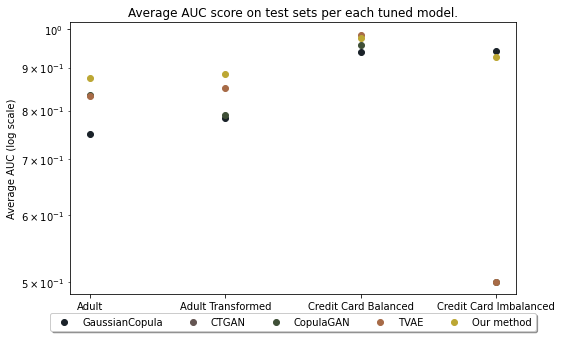

In [131]:
plt.figure(figsize=(8, 5))
for key in dict_results_untuned_avg_auc.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_untuned_avg_auc[key]['Data Set'], dict_results_untuned_avg_auc[key]['AVG AUC'], color = color_, label=key)
# plt.scatter(ctgan_plus_auc_test_results['data_set'], ctgan_plus_auc_test_results['AUC'],label='CTAB-GAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
# plt.ylim([0.49, 1.01])
plt.ylabel("Average AUC (log scale)")
plt.title("Average AUC score on test sets per each untuned model.")
plt.savefig("../data/figures/results_untuned_models_average_test_auc.jpg", bbox_inches='tight')
plt.show()
plt.close()

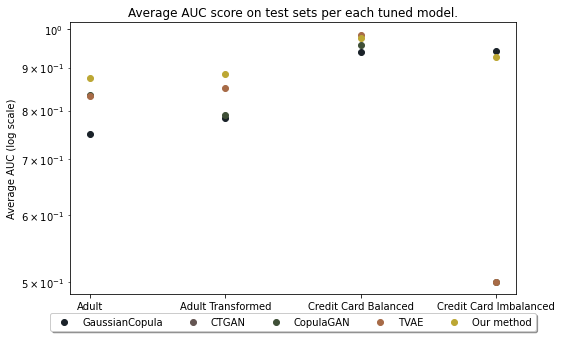

In [135]:
plt.figure(figsize=(8, 5))
for key in dict_results_tuned_avg_auc.keys():
    color_ = colors_methods[key]
    plt.scatter(dict_results_tuned_avg_auc[key]['Data Set'], dict_results_tuned_avg_auc[key]['AVG AUC'], color = color_, label=key)
# plt.scatter(ctgan_plus_auc_test_results['data_set'], ctgan_plus_auc_test_results['AUC'],label='CTAB-GAN+')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
plt.yscale("log")
# plt.ylim([0.49, 1.01])
plt.ylabel("Average AUC (log scale)")
plt.title("Average AUC score on test sets per each tuned model.")
# plt.savefig("../data/figures/results_tuned_models_average_test_auc.jpg", bbox_inches='tight')
plt.show()
plt.close()